In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')

In [2]:
ds = pd.read_csv('D:/3Kurs/1Sem/SS/rgr/Data/Life_Expectancy_Data_fixed.csv')


In [3]:
ds

,Unnamed: 0,Country,Year,Status,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,...,Polio,Total_expenditure,Diphtheria,Incidents_HIV,GDP,Population,Thinness_ten_nineteen_years,Thinness_five_nine_years,Income_composition_of_resources,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
r = 0
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum(), "\t\t\t\t\t",round((ds[x].isnull().sum()*100)/ds.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nCount columns: ", r)

Life_expectancy 10 					 0.34 %
Adult_Mortality 10 					 0.34 %
Alcohol 194 					 6.6 %
Hepatitis_B 553 					 18.82 %
BMI 34 					 1.16 %
Polio 19 					 0.65 %
Total_expenditure 226 					 7.69 %
Diphtheria 19 					 0.65 %
GDP 448 					 15.25 %
Population 652 					 22.19 %
Thinness_ten_nineteen_years 34 					 1.16 %
Thinness_five_nine_years 34 					 1.16 %
Income_composition_of_resources 167 					 5.68 %
Schooling 163 					 5.55 %

Count columns:  14


### First, I remove all rows with more than 5 missing values

In [5]:
missing_rows = ds[ds.isnull().sum(axis=1) >= 5]

# print(missing_rows.shape[0],'\n')
# print(ds.shape[0])
print("Percentage of rows with more than or equal to 5 missing values:",round((missing_rows.shape[0]*100)/ds.shape[0],3),"%\n")


Percentage of rows with more than or equal to 5 missing values: 2.927 %



In [6]:
ds_cleaned = ds.drop(missing_rows.index)
print(ds.shape)
print(ds_cleaned.shape)

(2938, 23)
(2852, 23)


### And now those 10 lines, of which only data for 2013 in 10 countries are known

In [ ]:
countries_to_remove = [
    'Marshall Islands', 'Cook Islands', 'Dominica', 'Monaco', 
    'Nauru', 'Niue', 'Saint Kitts and Nevis', 'San Marino', 
    'Tuvalu', 'Palau'
]

ds_cleaned = ds_cleaned[~ds_cleaned['Country'].isin(countries_to_remove)]

print(ds.shape)
print(ds_cleaned.shape)

(2938, 23)
(2846, 23)
92


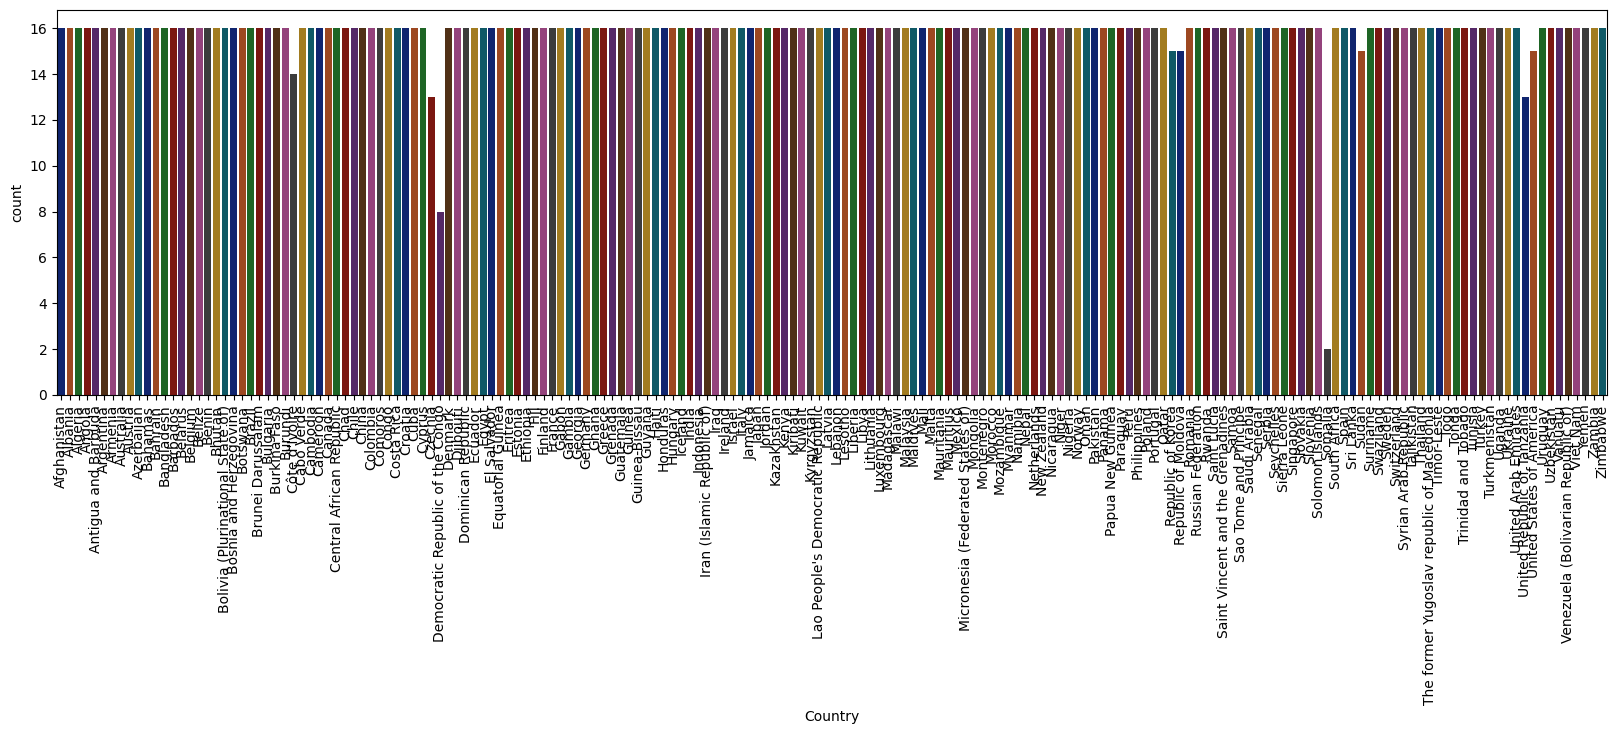

In [8]:
plt.rcParams["figure.figsize"] = (20, 5)
sns.countplot(x="Country", data=ds_cleaned, palette="dark")
plt.title("")
plt.xticks(rotation=90)

plt.show()

In [9]:
r = 0
missing = list()
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t\t\t\t\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nCount columns: ", r)

Alcohol 167 					 5.87 %
Hepatitis_B 494 					 17.36 %
BMI 15 					 0.53 %
Polio 8 					 0.28 %
Total_expenditure 174 					 6.11 %
Diphtheria 8 					 0.28 %
GDP 371 					 13.04 %
Population 579 					 20.34 %
Thinness_ten_nineteen_years 15 					 0.53 %
Thinness_five_nine_years 15 					 0.53 %
Income_composition_of_resources 95 					 3.34 %
Schooling 95 					 3.34 %

Count columns:  12


### These manipulations helped to reduce the number of rows with missing values, which makes Data cleaning more efficient.

### You can also see that all the columns with missing values are numeric, so I will use the methods for numeric values.

First, I will analyze the numeric columns and then fill in the missing values with one of the methods that works for them

<Axes: >

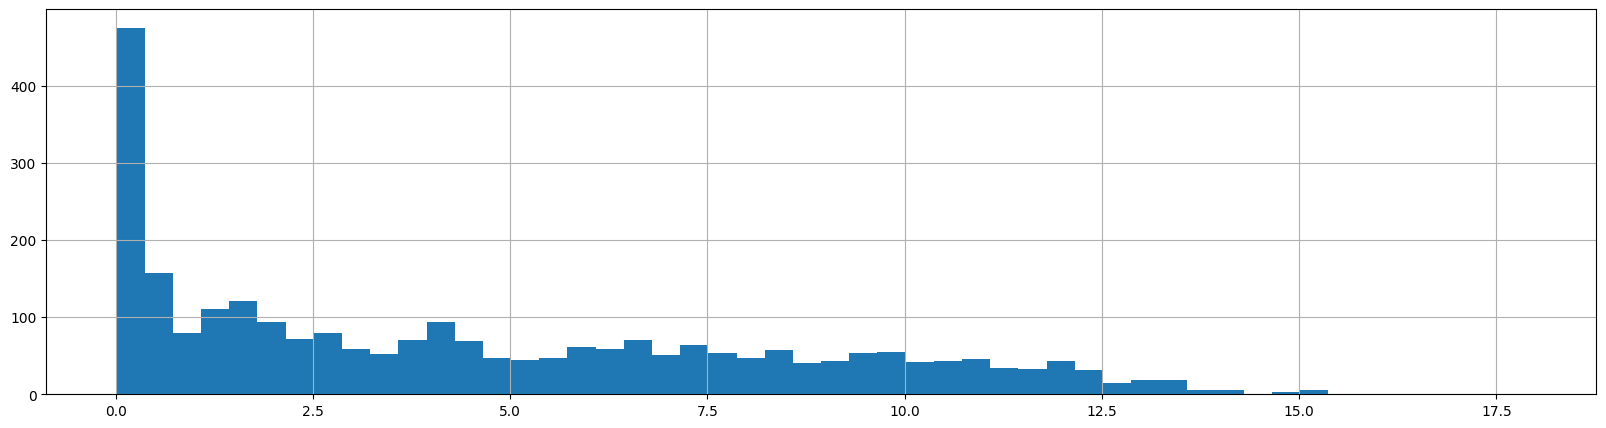

In [10]:
ds_cleaned[ds_cleaned['Alcohol']<5000]['Alcohol'].hist(bins=50)

This is to understand whether the date was missed by accident or not

In [11]:
ds_claster = ds_cleaned.copy()
features = ds_claster.select_dtypes(include=np.number).fillna(0)

kmeans = KMeans(n_clusters=3)

In [12]:
ds_claster['Alcohol_missing'] = ds_claster['Alcohol'].isnull().astype(int)
ds_claster['cluster_Alcohol'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Alcohol')['Alcohol_missing'].mean())

cluster_Alcohol
0    0.058760
1    0.000000
2    0.059701
Name: Alcohol_missing, dtype: float64


<Axes: >

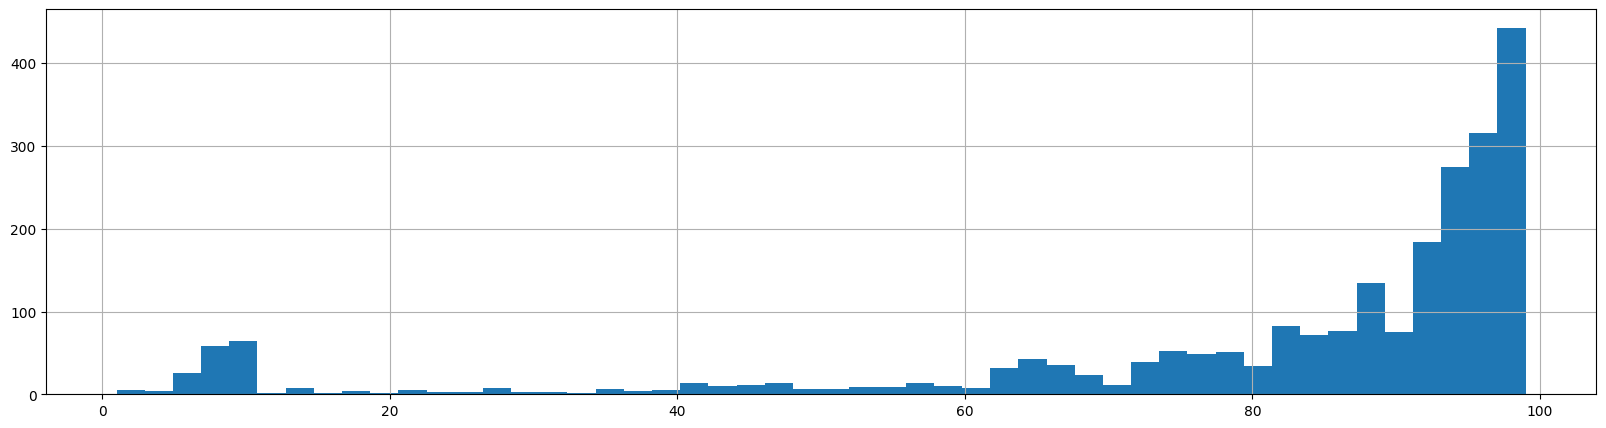

In [13]:
ds_cleaned[ds_cleaned['Hepatitis_B']<5000]['Hepatitis_B'].hist(bins=50)

In [14]:
ds_claster['Hepatitis_B_missing'] = ds_claster['Hepatitis_B'].isnull().astype(int)
ds_claster['cluster_Hepatitis_B'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Hepatitis_B')['Hepatitis_B_missing'].mean())

cluster_Hepatitis_B
0    0.175198
1    0.000000
2    0.119403
Name: Hepatitis_B_missing, dtype: float64


<Axes: >

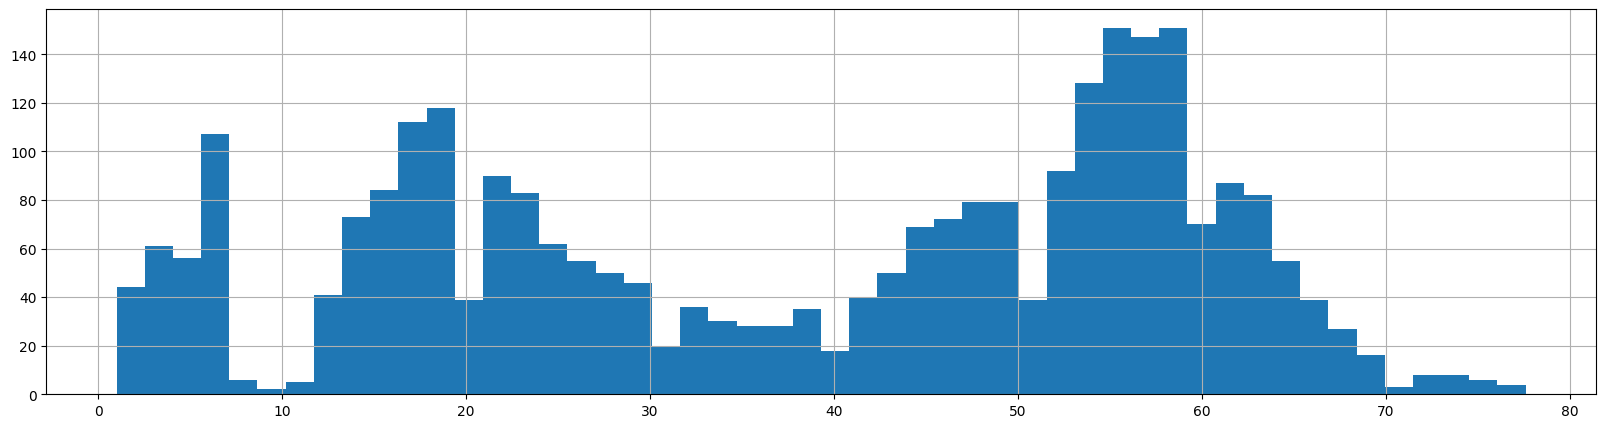

In [15]:
ds_cleaned[ds_cleaned['BMI']<5000]['BMI'].hist(bins=50)

In [16]:
ds_claster['BMI_missing'] = ds_claster['BMI'].isnull().astype(int)
ds_claster['cluster_BMI'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_BMI')['BMI_missing'].mean())

cluster_BMI
0    0.005407
1    0.000000
2    0.000000
Name: BMI_missing, dtype: float64


<Axes: >

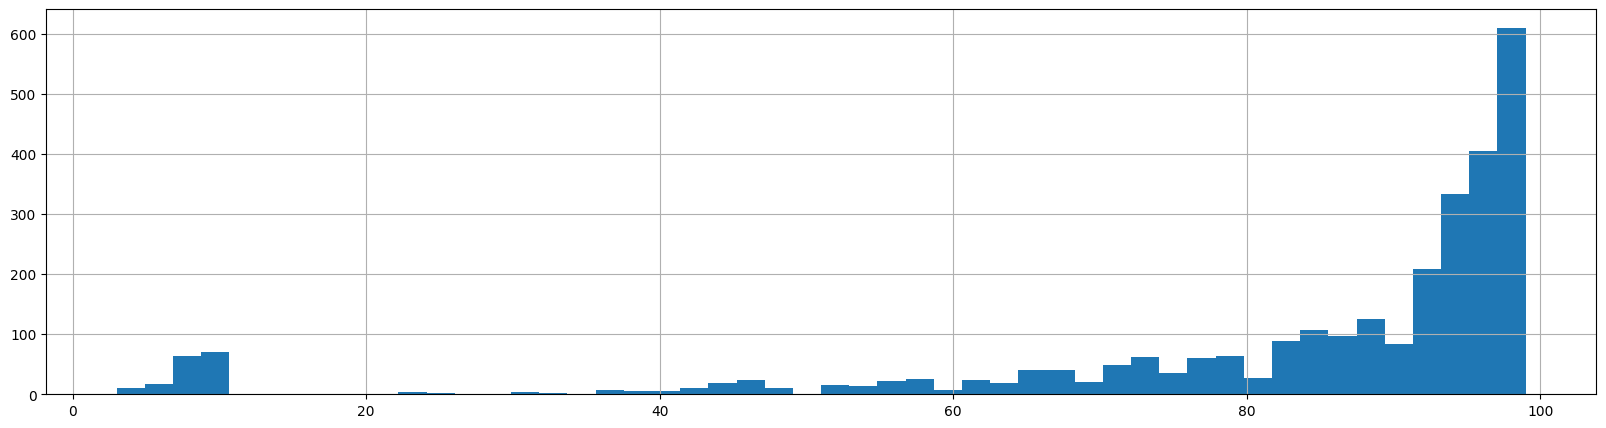

In [17]:
ds_cleaned[ds_cleaned['Polio']<5000]['Polio'].hist(bins=50)

In [18]:
ds_claster['Polio_missing'] = ds_claster['Polio'].isnull().astype(int)
ds_claster['cluster_Polio'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Polio')['Polio_missing'].mean())

cluster_Polio
0    0.002884
1    0.000000
2    0.000000
Name: Polio_missing, dtype: float64


<Axes: >

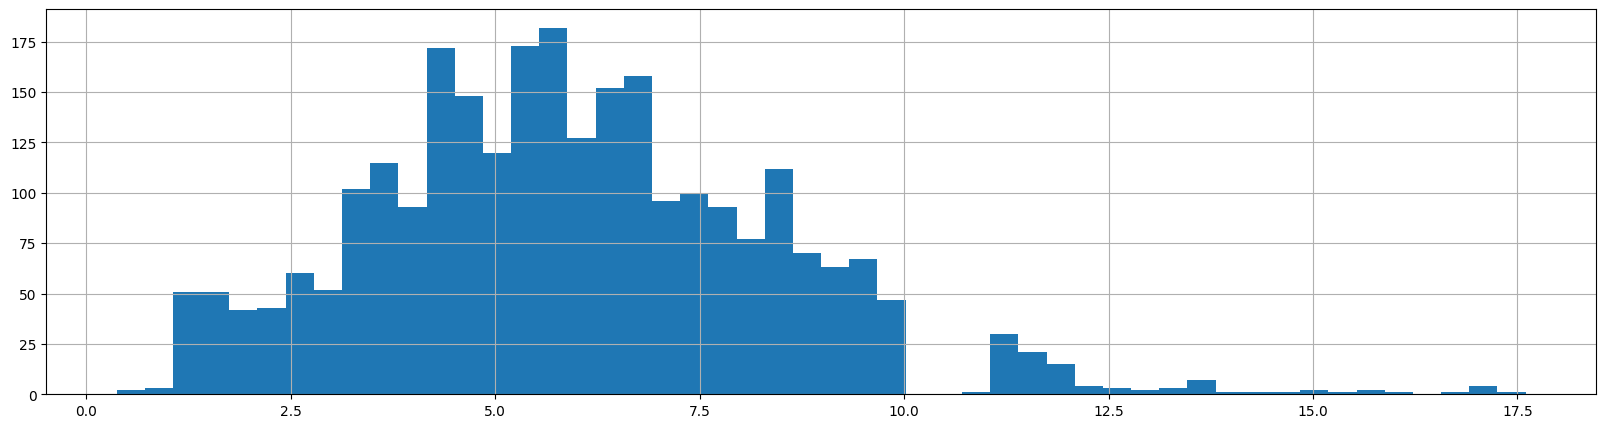

In [19]:
ds_cleaned[ds_cleaned['Total_expenditure']<5000]['Total_expenditure'].hist(bins=50)

In [20]:
ds_claster['Total_expenditure_missing'] = ds_claster['Total_expenditure'].isnull().astype(int)
ds_claster['cluster_Total_expenditure'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Total_expenditure')['Total_expenditure_missing'].mean())

cluster_Total_expenditure
0    0.061328
1    0.000000
2    0.057971
Name: Total_expenditure_missing, dtype: float64


<Axes: >

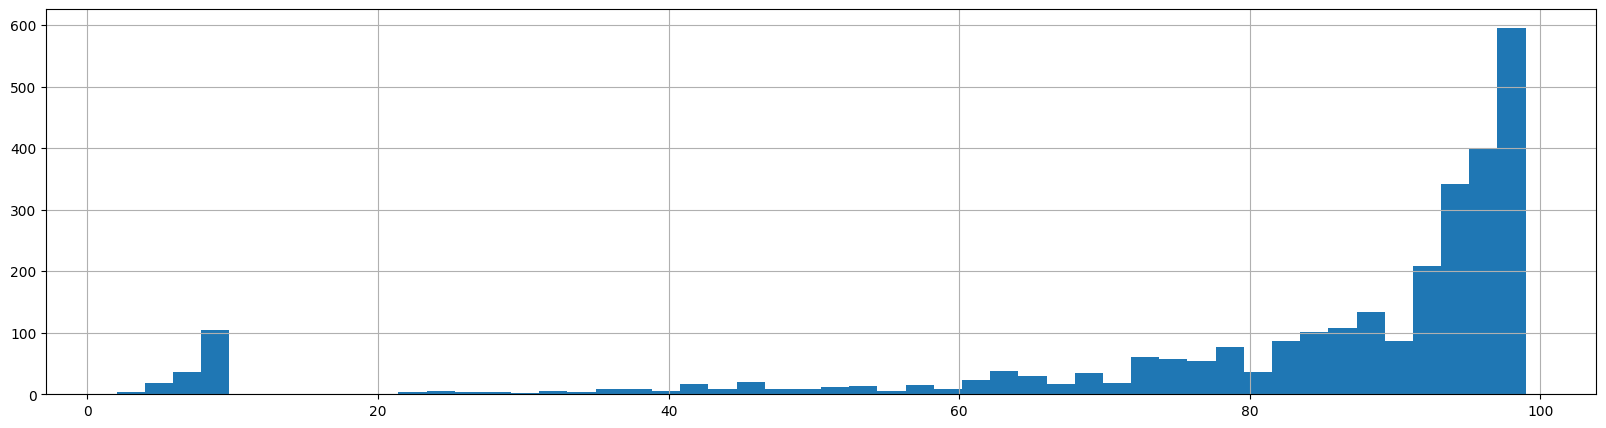

In [21]:
ds_cleaned[ds_cleaned['Diphtheria']<5000]['Diphtheria'].hist(bins=50)

In [22]:
ds_claster['Diphtheria_missing'] = ds_claster['Diphtheria'].isnull().astype(int)
ds_claster['cluster_Diphtheria'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Diphtheria')['Diphtheria_missing'].mean())

cluster_Diphtheria
0    0.002886
1    0.000000
2    0.000000
Name: Diphtheria_missing, dtype: float64


<Axes: >

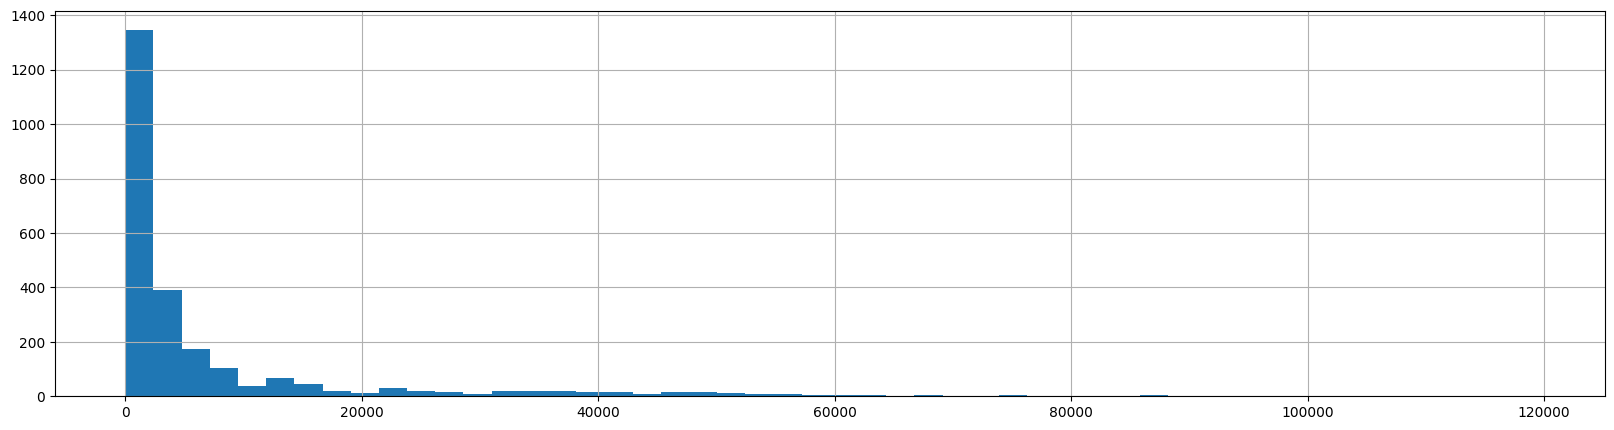

In [23]:
ds_cleaned[ds_cleaned['GDP']<5000000]['GDP'].hist(bins=50)

In [24]:
ds_claster['GDP_missing'] = ds_claster['GDP'].isnull().astype(int)
ds_claster['cluster_GDP'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_GDP')['GDP_missing'].mean())

cluster_GDP
0    0.133742
1    0.000000
2    0.000000
Name: GDP_missing, dtype: float64


<Axes: >

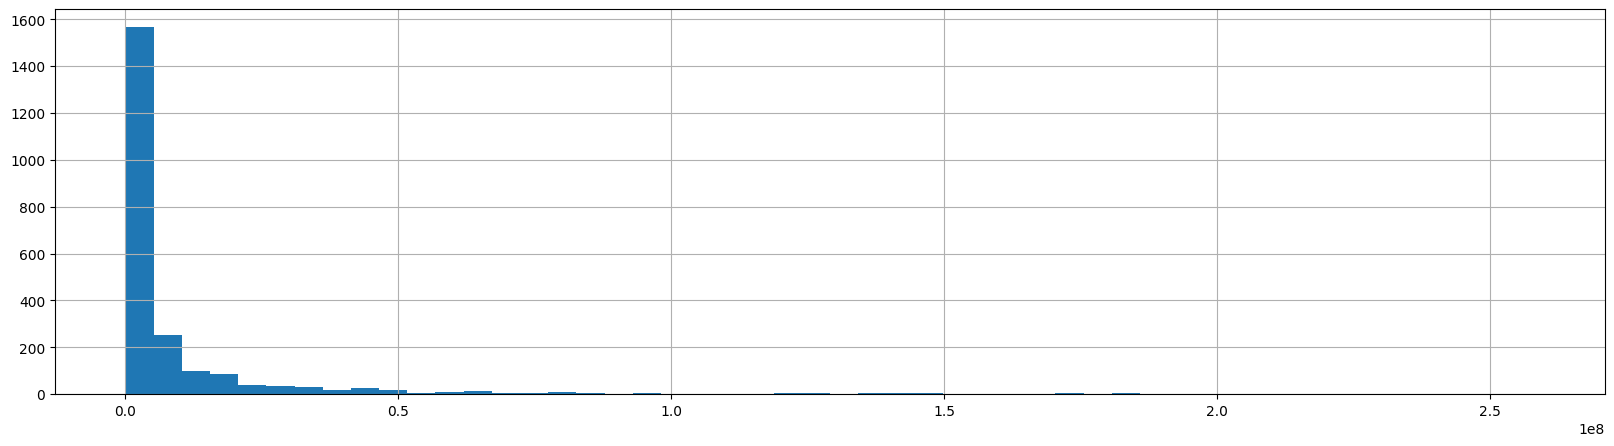

In [25]:
ds_cleaned[ds_cleaned['Population']<500000000]['Population'].hist(bins=50)

In [26]:
ds_claster['Population_missing'] = ds_claster['Population'].isnull().astype(int)
ds_claster['cluster_Population'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Population')['Population_missing'].mean())

cluster_Population
0    0.208724
1    0.000000
2    0.000000
Name: Population_missing, dtype: float64


<Axes: >

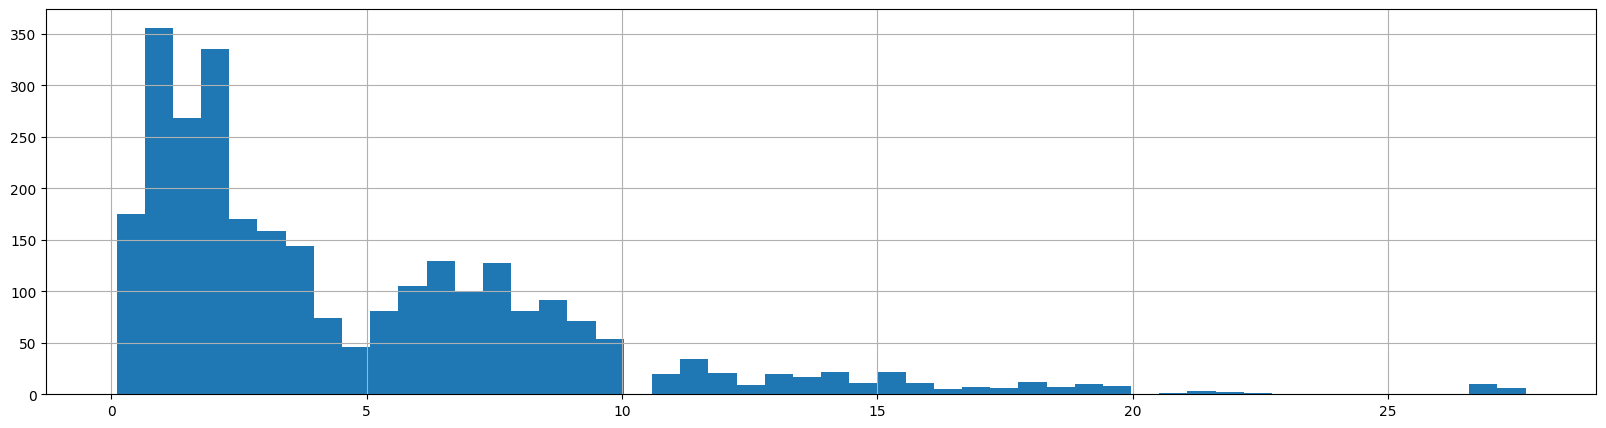

In [27]:
ds_cleaned[ds_cleaned['Thinness_ten_nineteen_years']<500000000]['Thinness_ten_nineteen_years'].hist(bins=50)

In [28]:
ds_claster['Thinness_ten_nineteen_years_missing'] = ds_claster['Thinness_ten_nineteen_years'].isnull().astype(int)
ds_claster['cluster_Thinness_ten_nineteen_years'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Thinness_ten_nineteen_years')['Thinness_ten_nineteen_years_missing'].mean())

cluster_Thinness_ten_nineteen_years
0    0.000000
1    0.005411
2    0.000000
Name: Thinness_ten_nineteen_years_missing, dtype: float64


<Axes: >

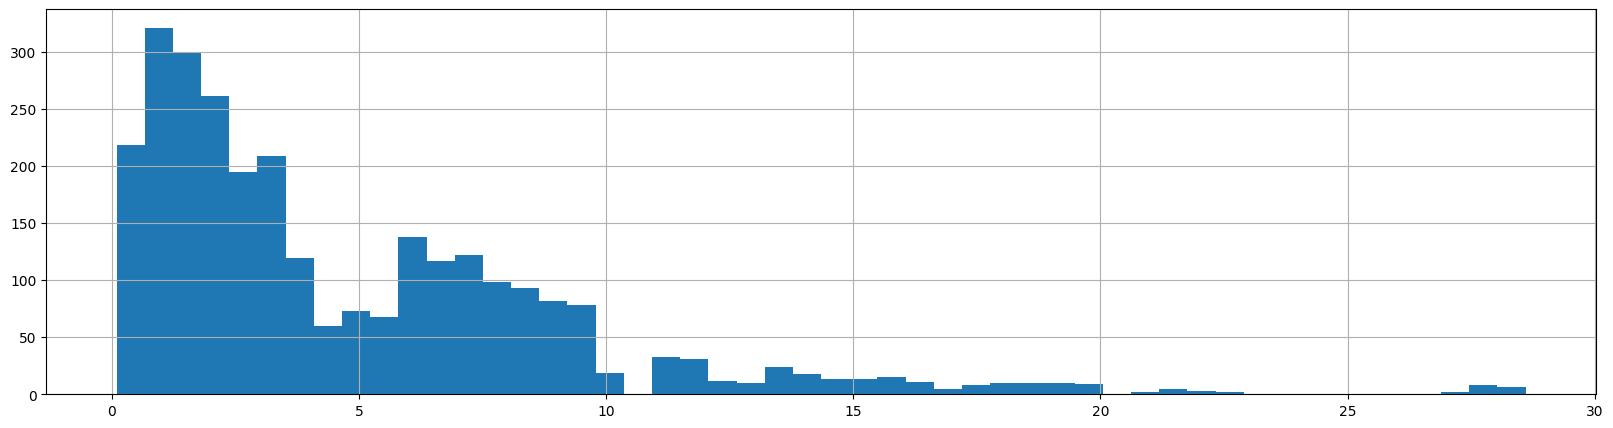

In [29]:
ds_cleaned[ds_cleaned['Thinness_five_nine_years']<500000000]['Thinness_five_nine_years'].hist(bins=50)

In [30]:
ds_claster['Thinness_five_nine_years_missing'] = ds_claster['Thinness_five_nine_years'].isnull().astype(int)
ds_claster['cluster_Thinness_five_nine_years'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Thinness_five_nine_years')['Thinness_five_nine_years_missing'].mean())

cluster_Thinness_five_nine_years
0    0.005407
1    0.000000
2    0.000000
Name: Thinness_five_nine_years_missing, dtype: float64


<Axes: >

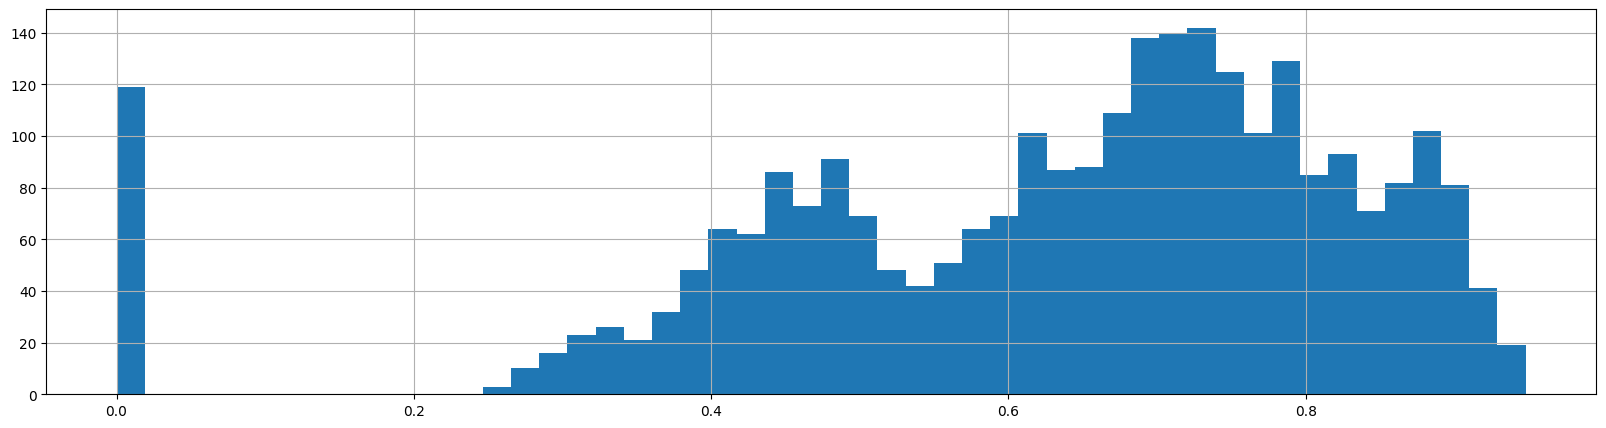

In [31]:
ds_cleaned[ds_cleaned['Income_composition_of_resources']<500000000]['Income_composition_of_resources'].hist(bins=50)

In [32]:
ds_claster['Income_composition_of_resources_missing'] = ds_claster['Income_composition_of_resources'].isnull().astype(int)
ds_claster['cluster_Income_composition_of_resources'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Income_composition_of_resources')['Income_composition_of_resources_missing'].mean())

cluster_Income_composition_of_resources
0    0.034247
1    0.000000
2    0.000000
Name: Income_composition_of_resources_missing, dtype: float64


<Axes: >

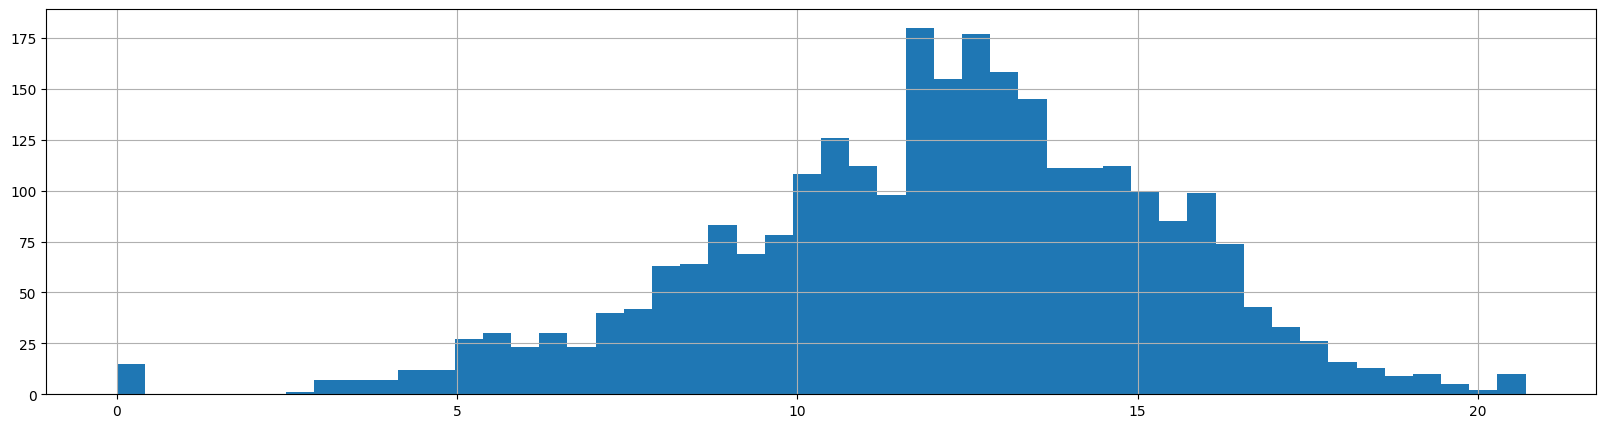

In [33]:
ds_cleaned[ds_cleaned['Schooling']<500000000]['Schooling'].hist(bins=50)

In [34]:
ds_claster['Schooling_missing'] = ds_claster['Schooling'].isnull().astype(int)
ds_claster['cluster_Schooling'] = kmeans.fit_predict(features)

print(ds_claster.groupby('cluster_Schooling')['Schooling_missing'].mean())

cluster_Schooling
0    0.034247
1    0.000000
2    0.000000
Name: Schooling_missing, dtype: float64


For columns: Alcohol, Hepatitis_B, Total_expenditure, GDP, Population - I will use persentline imputation

For columns: BMI, Polio, Diphtheria, Thinness_ten_nineteen_years, Thinness_five_nine_years, Income_composition_of_resources, Schooling - I will use mean/median imputation

In [35]:
def impute_na(df, variable, value):
    return df[variable].fillna(value)

In [36]:
percentile_impute_columns = ['Alcohol', 'Hepatitis_B', 'Total_expenditure', 'GDP', 'Population']
median_impute_columns = ['BMI', 'Polio', 'Diphtheria', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Income_composition_of_resources', 'Schooling']

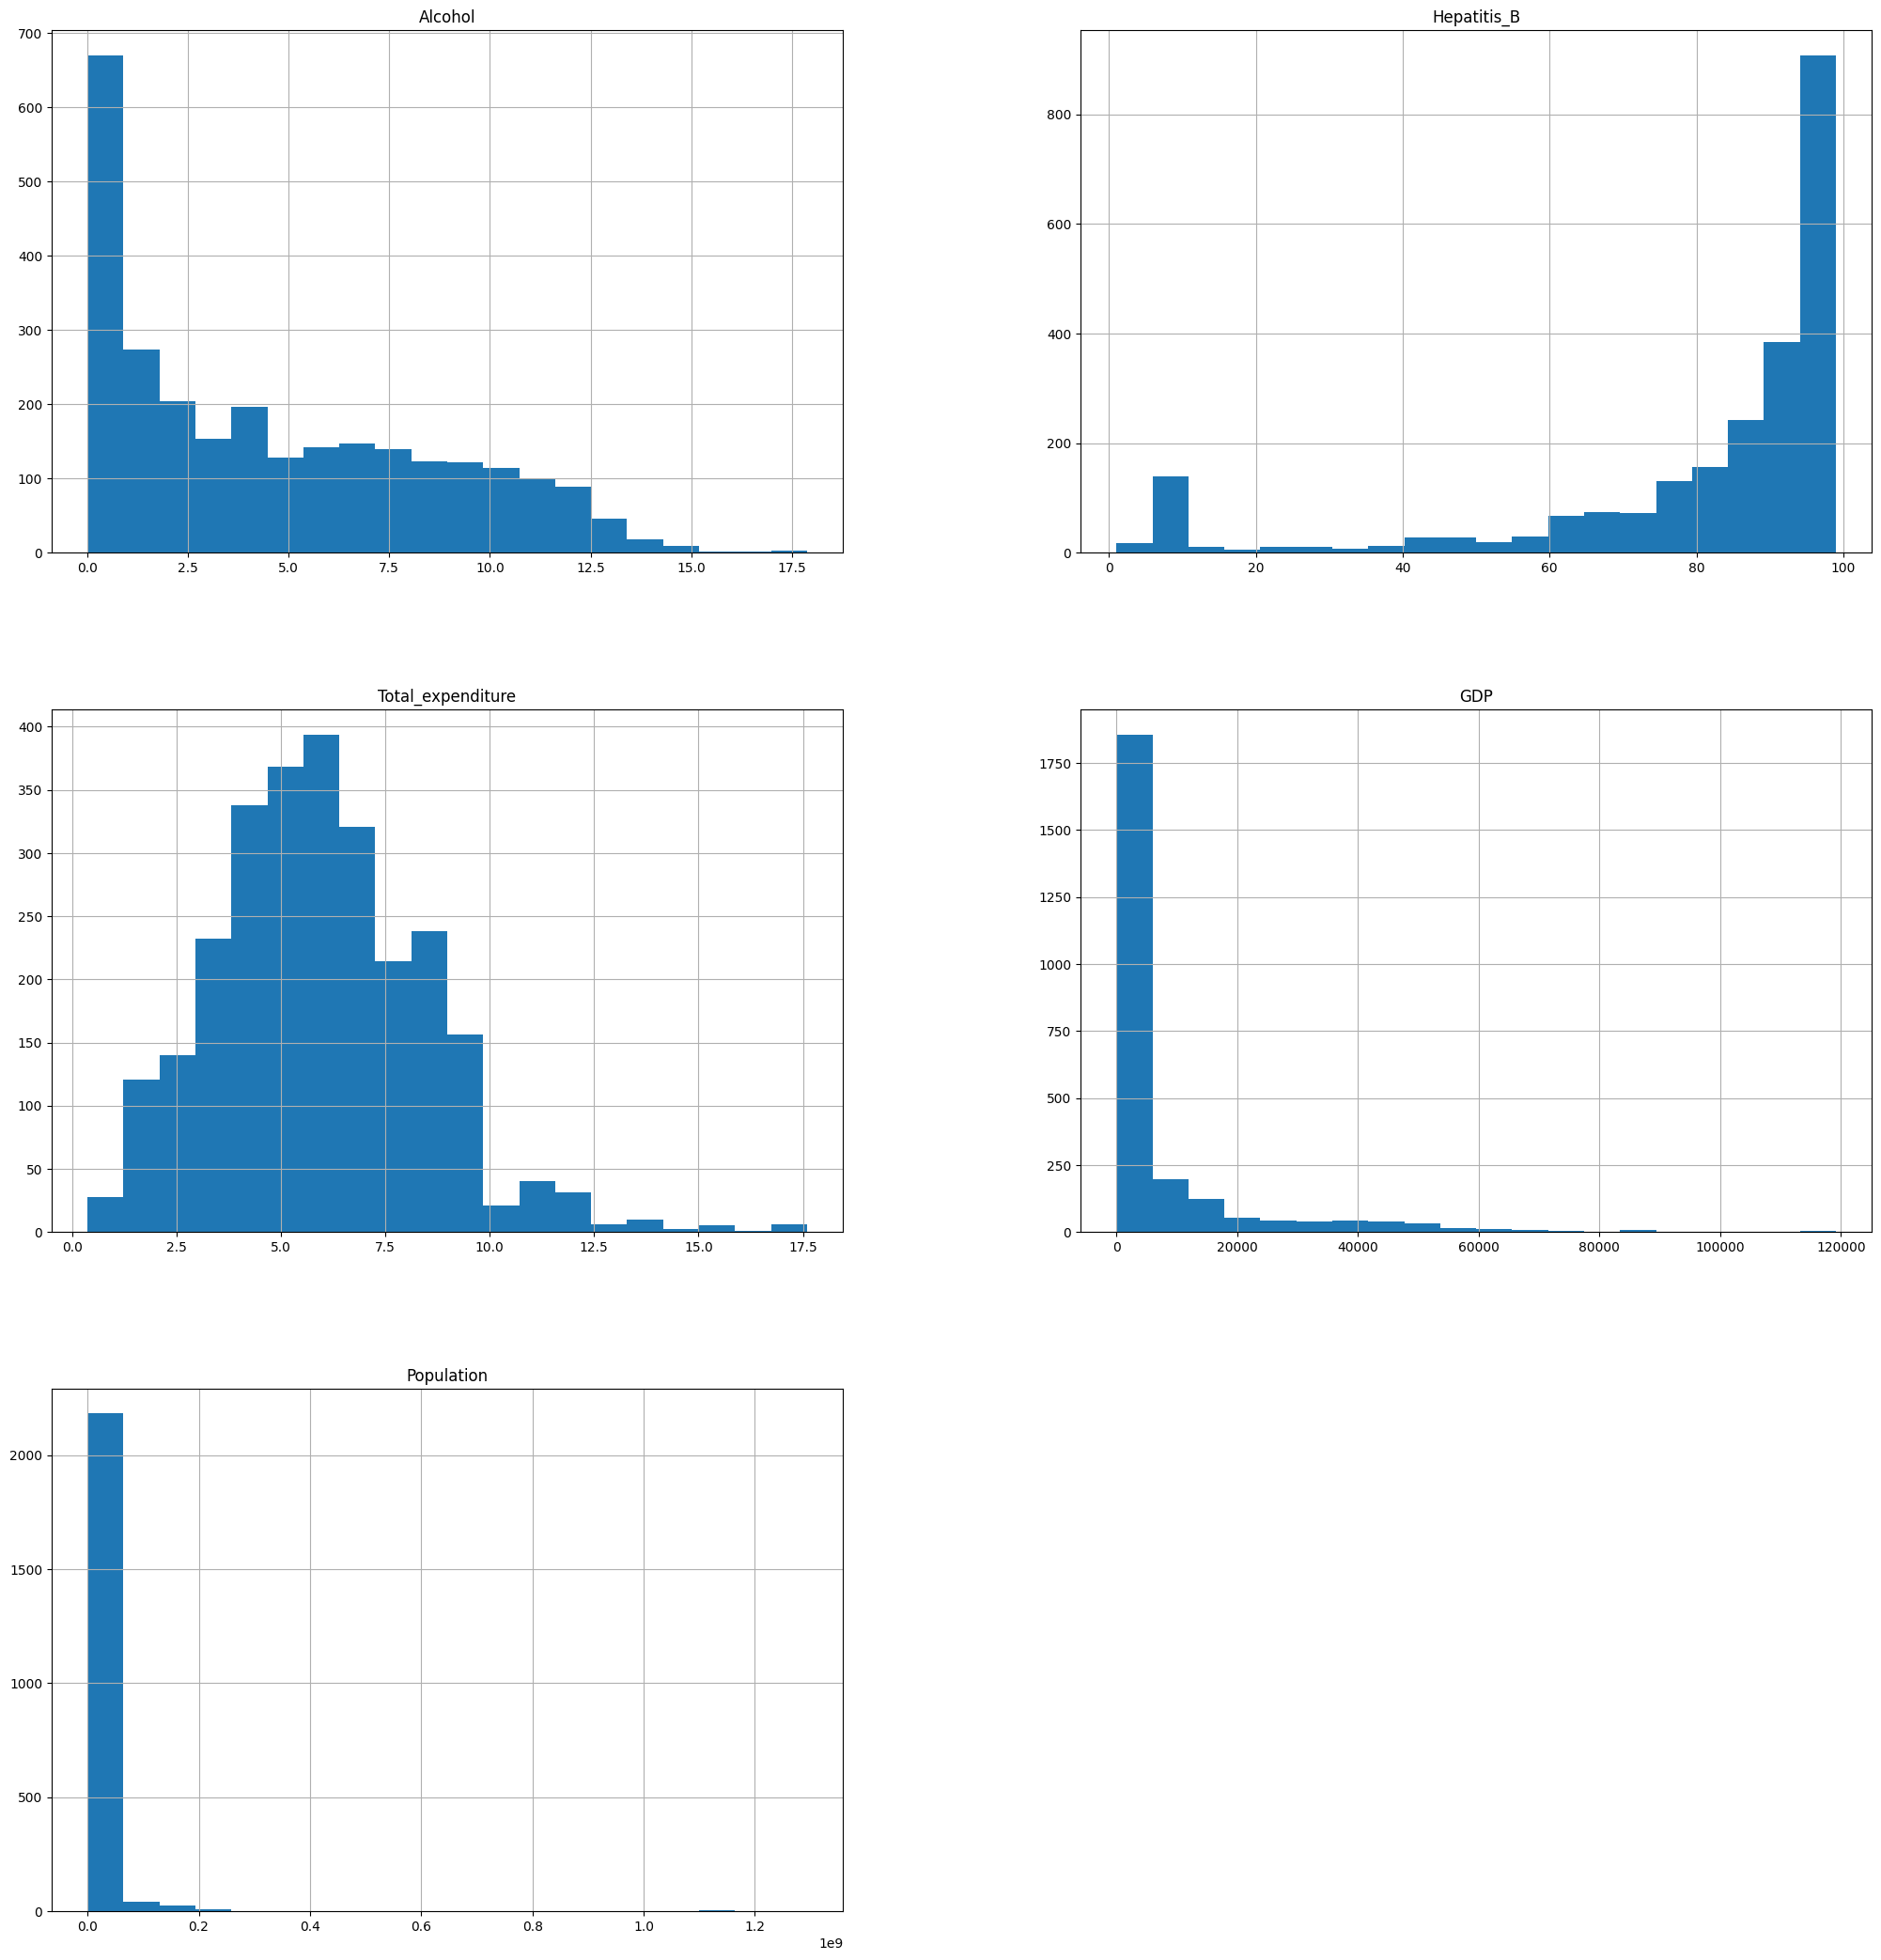

In [37]:
ds_cleaned[percentile_impute_columns].hist(bins=20, figsize=(25,26))
plt.show()

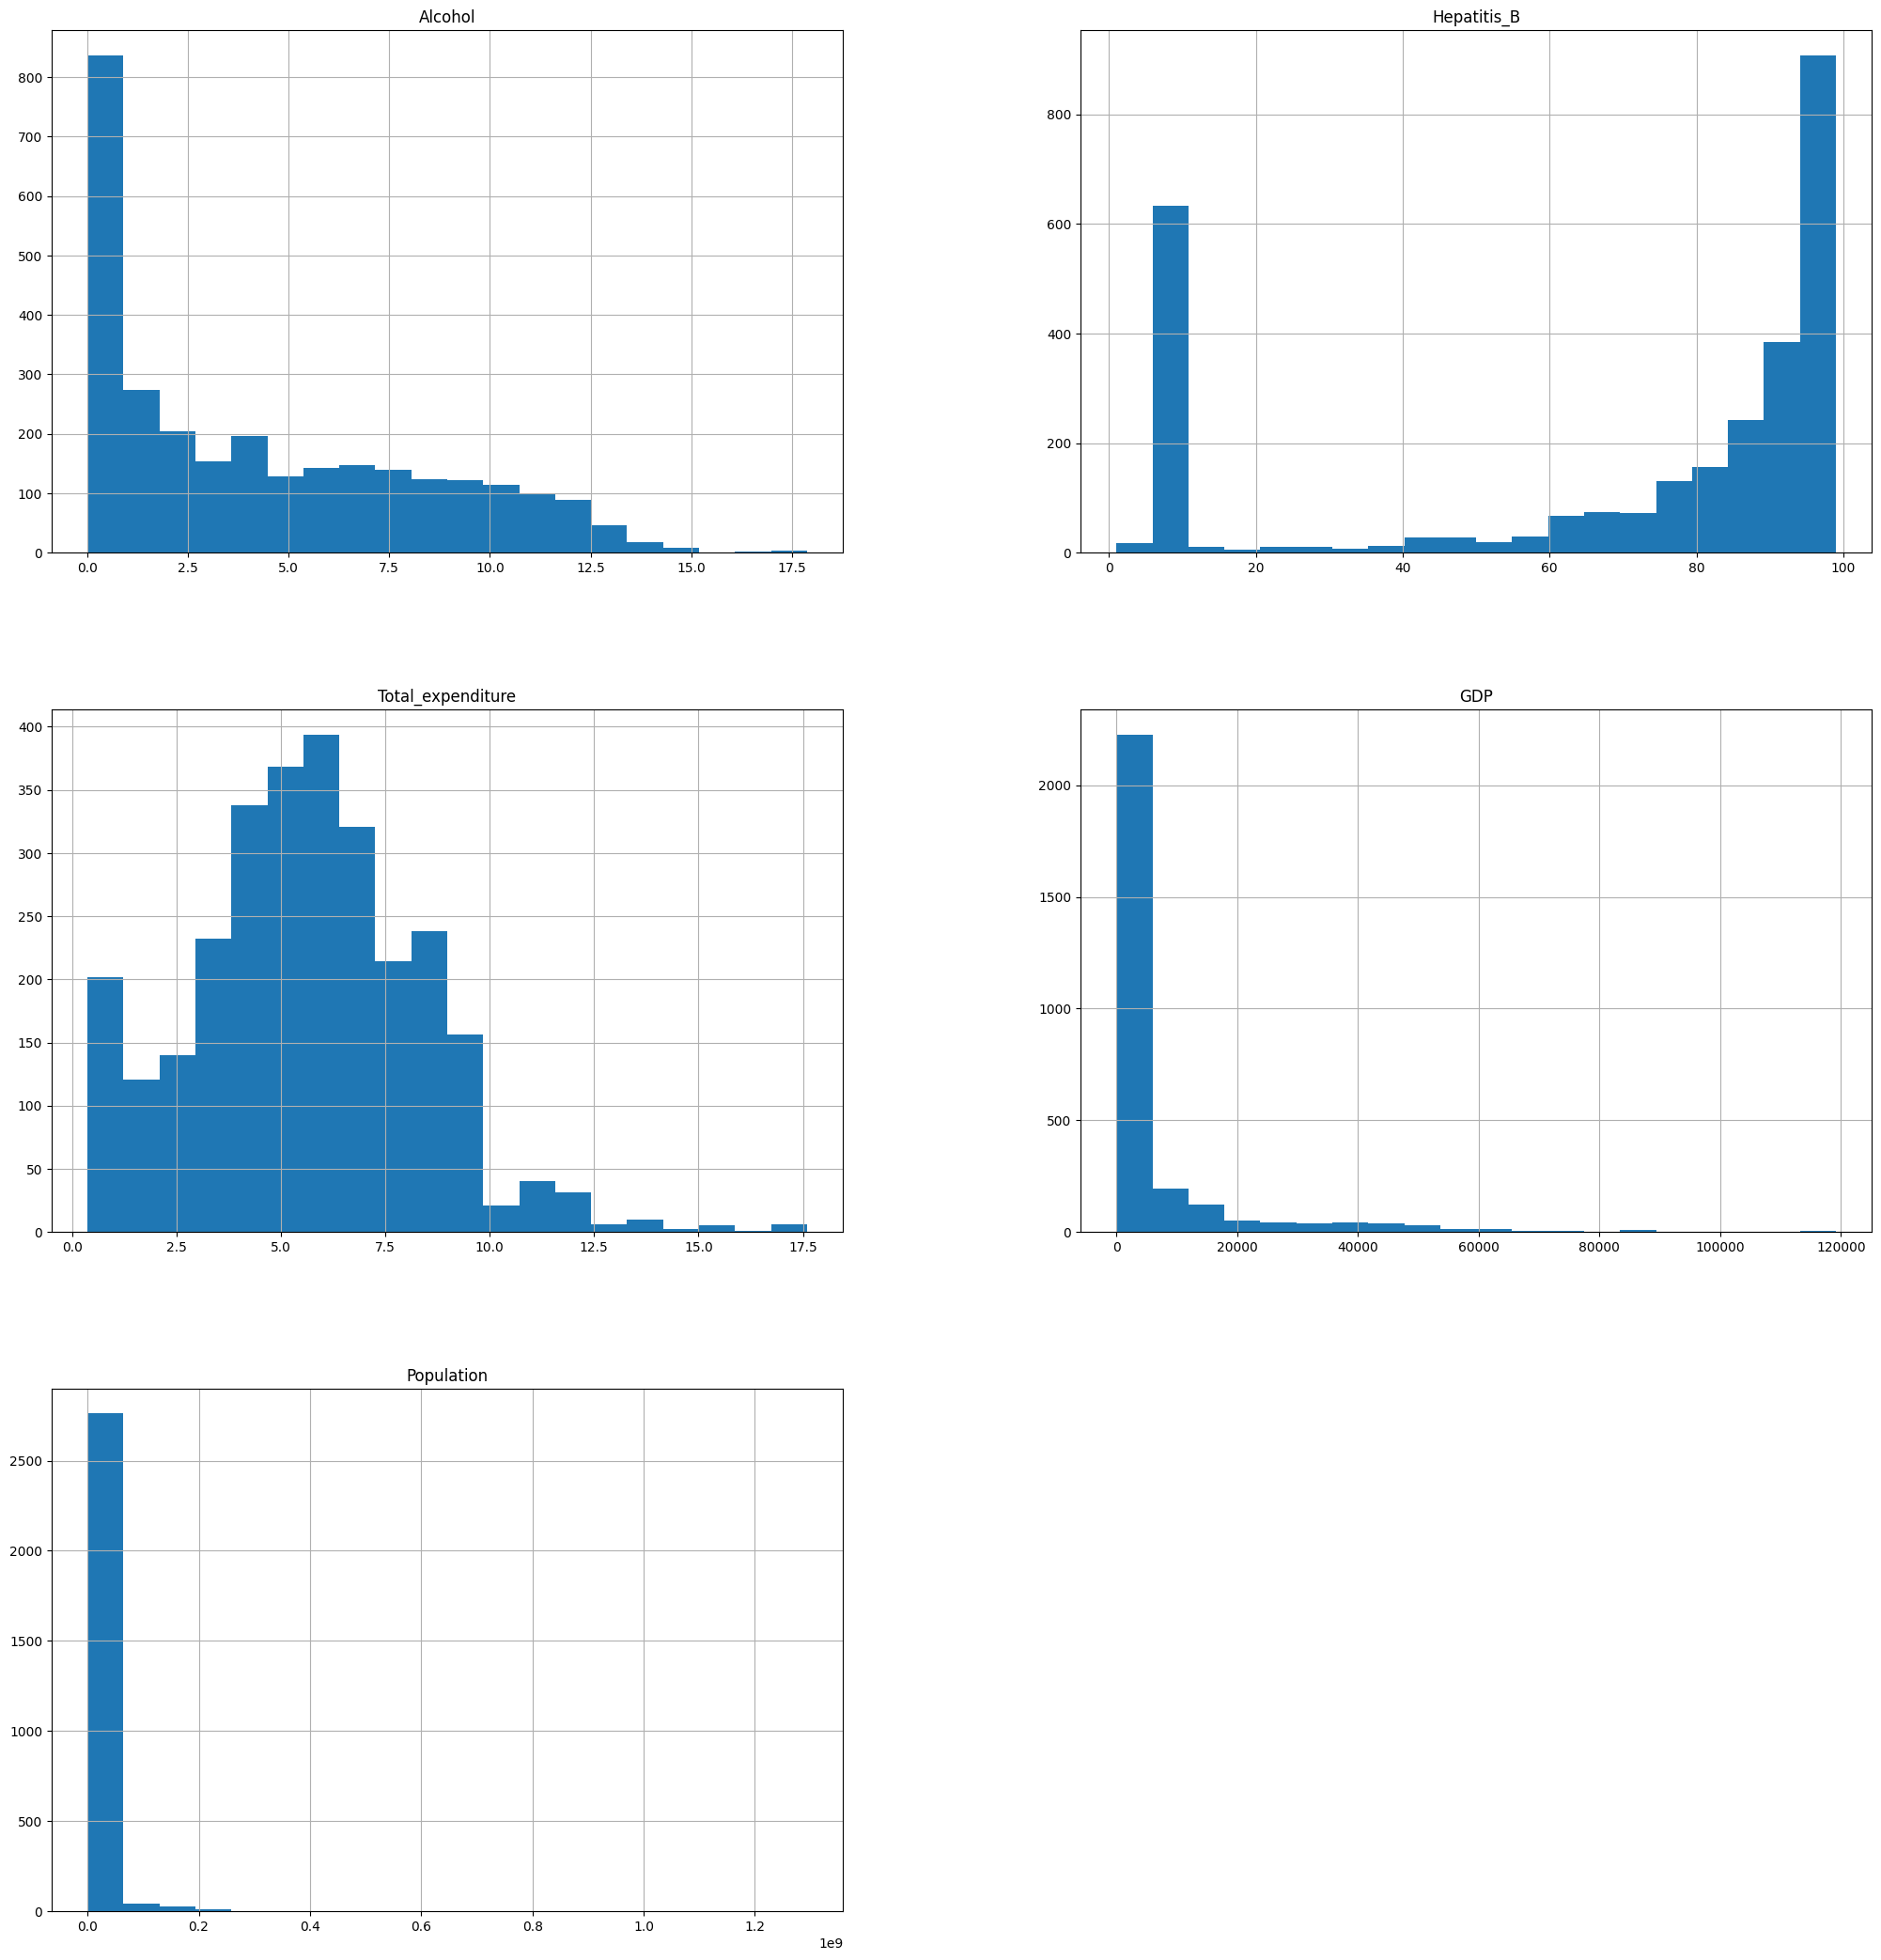

In [38]:
percentile_impute_column = {}
for column in percentile_impute_columns:
    percentile_impute_column[column] = ds_cleaned[column].quantile(0.01)
    ds_cleaned[column] = impute_na(ds_cleaned, column, percentile_impute_column[column])
    
ds_cleaned[percentile_impute_columns].hist(bins=20, figsize=(25,26))
plt.show()

In [39]:
r = 0
missing = list()
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t\t\t\t\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nCount columns: ", r)

BMI 15 					 0.53 %
Polio 8 					 0.28 %
Diphtheria 8 					 0.28 %
Thinness_ten_nineteen_years 15 					 0.53 %
Thinness_five_nine_years 15 					 0.53 %
Income_composition_of_resources 95 					 3.34 %
Schooling 95 					 3.34 %

Count columns:  7


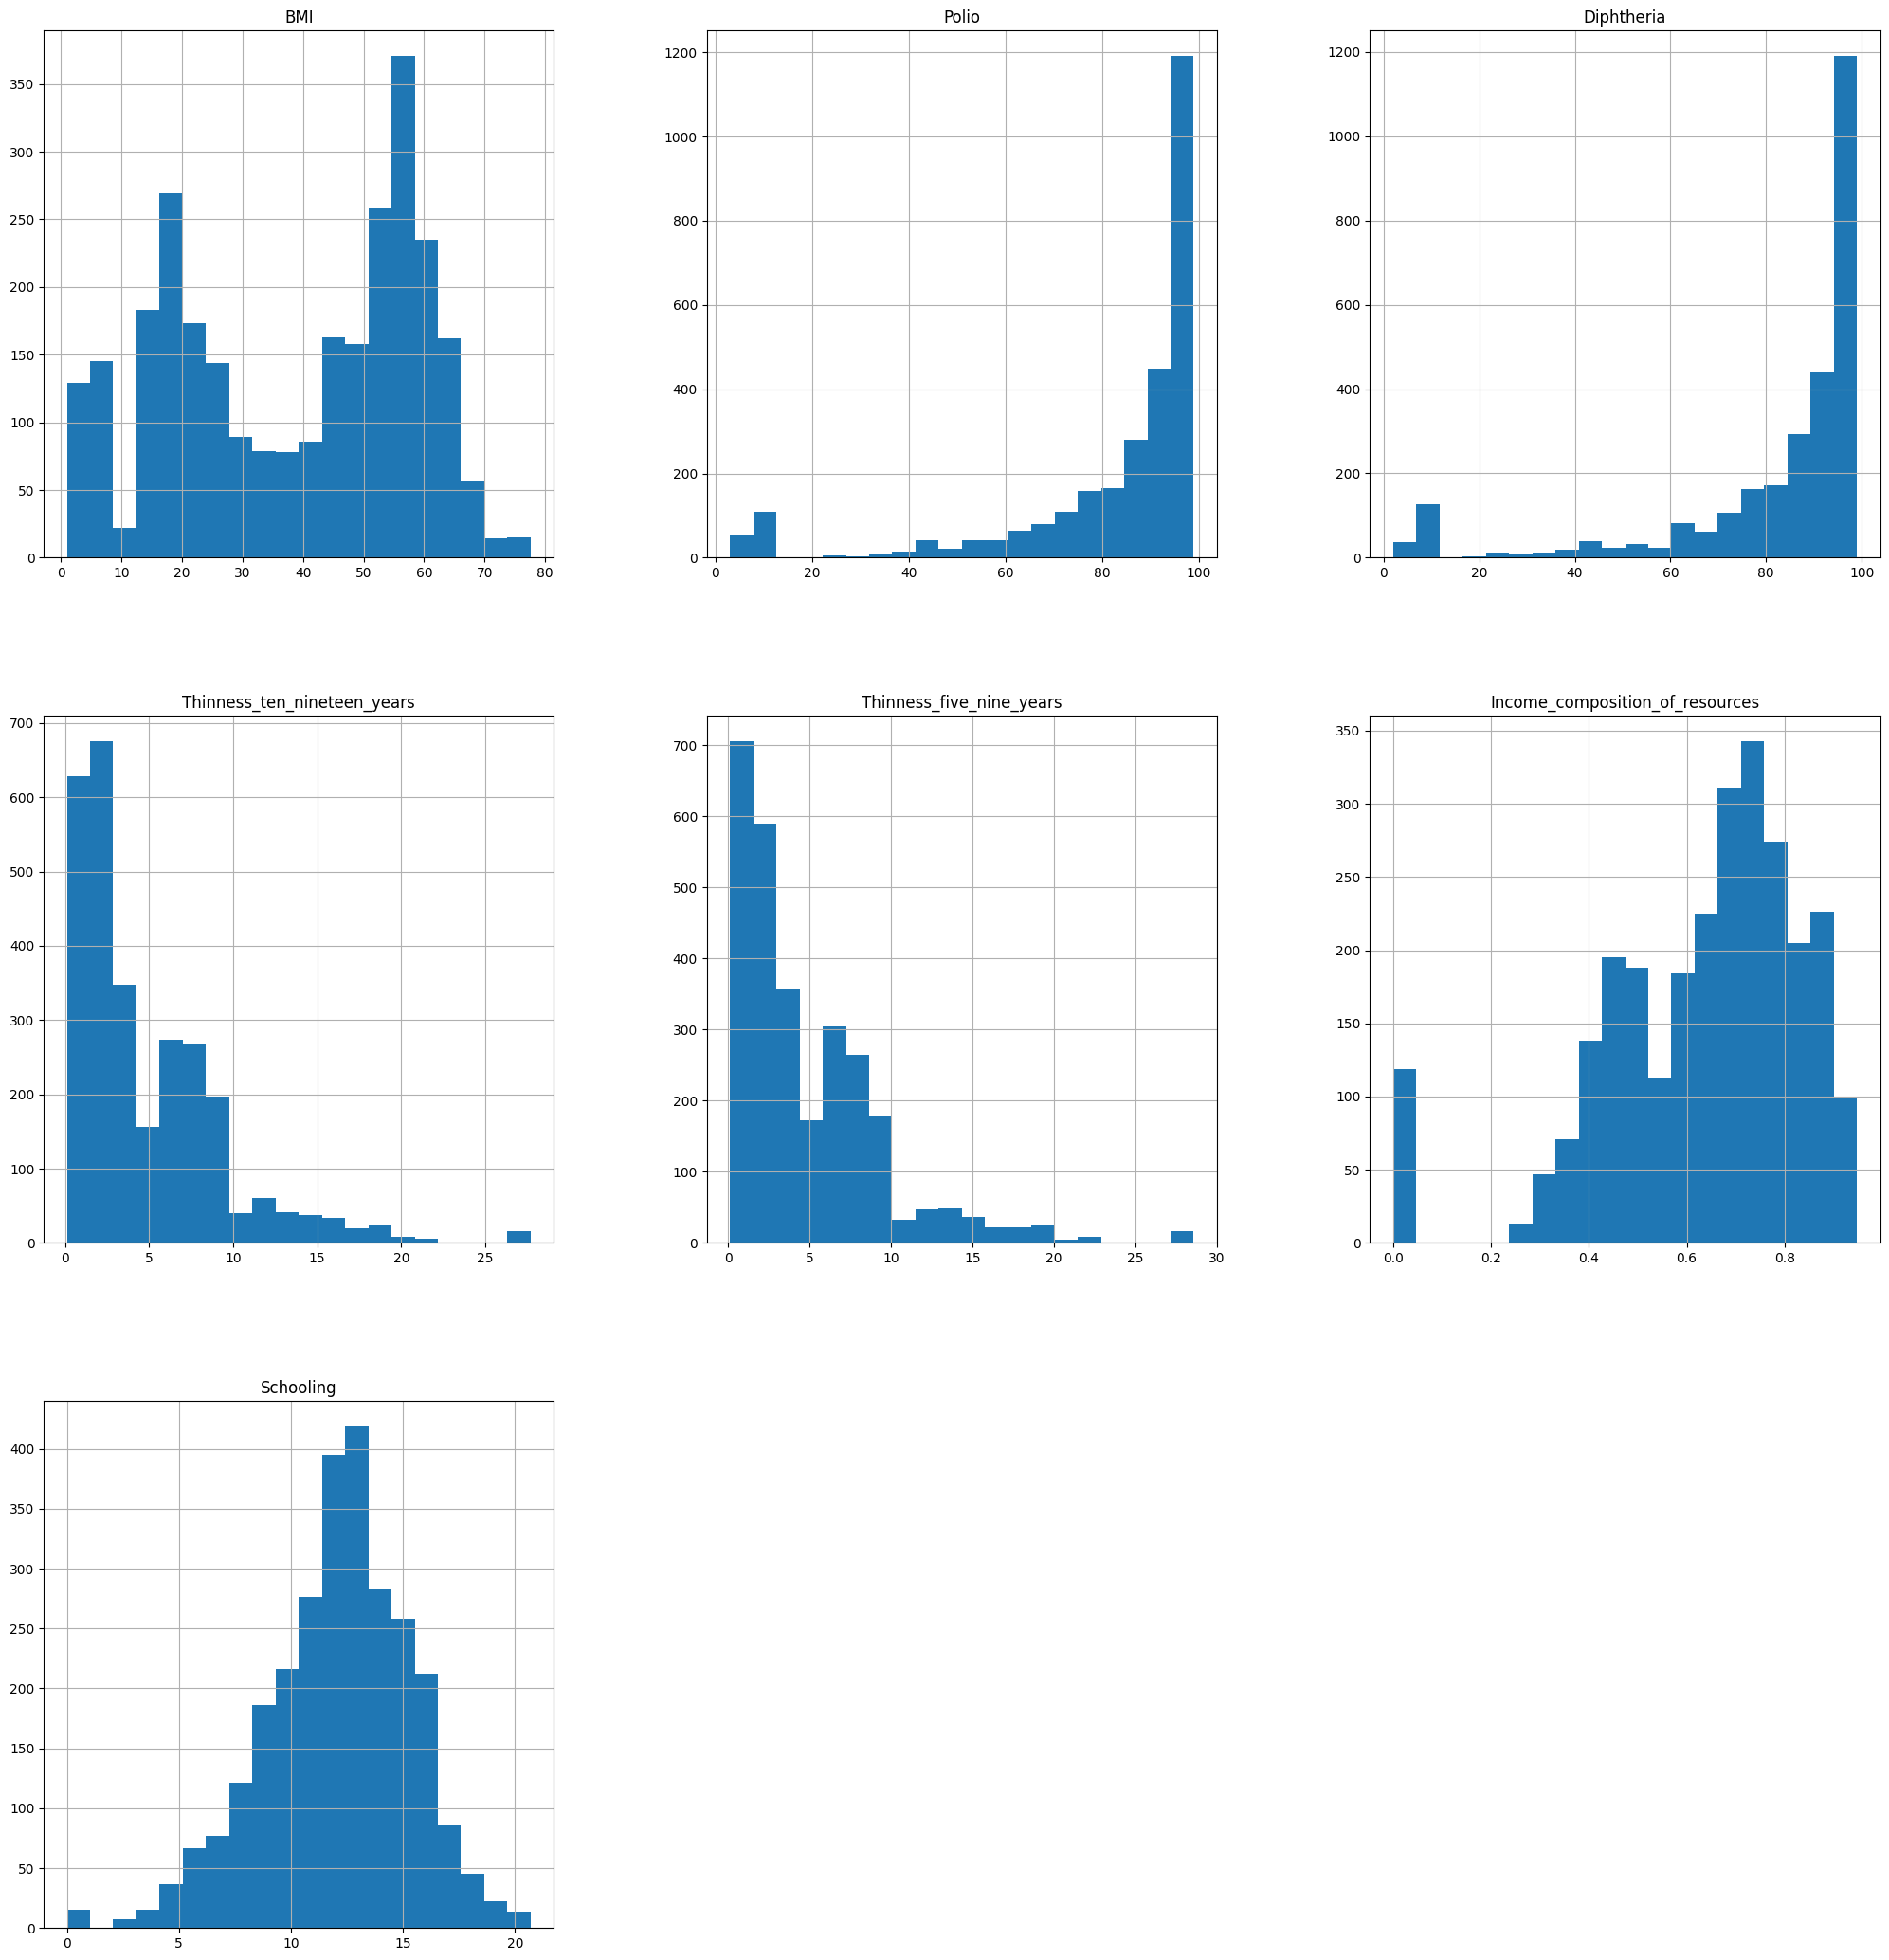

In [40]:
ds_cleaned[median_impute_columns].hist(bins=20, figsize=(25,26))
plt.show()

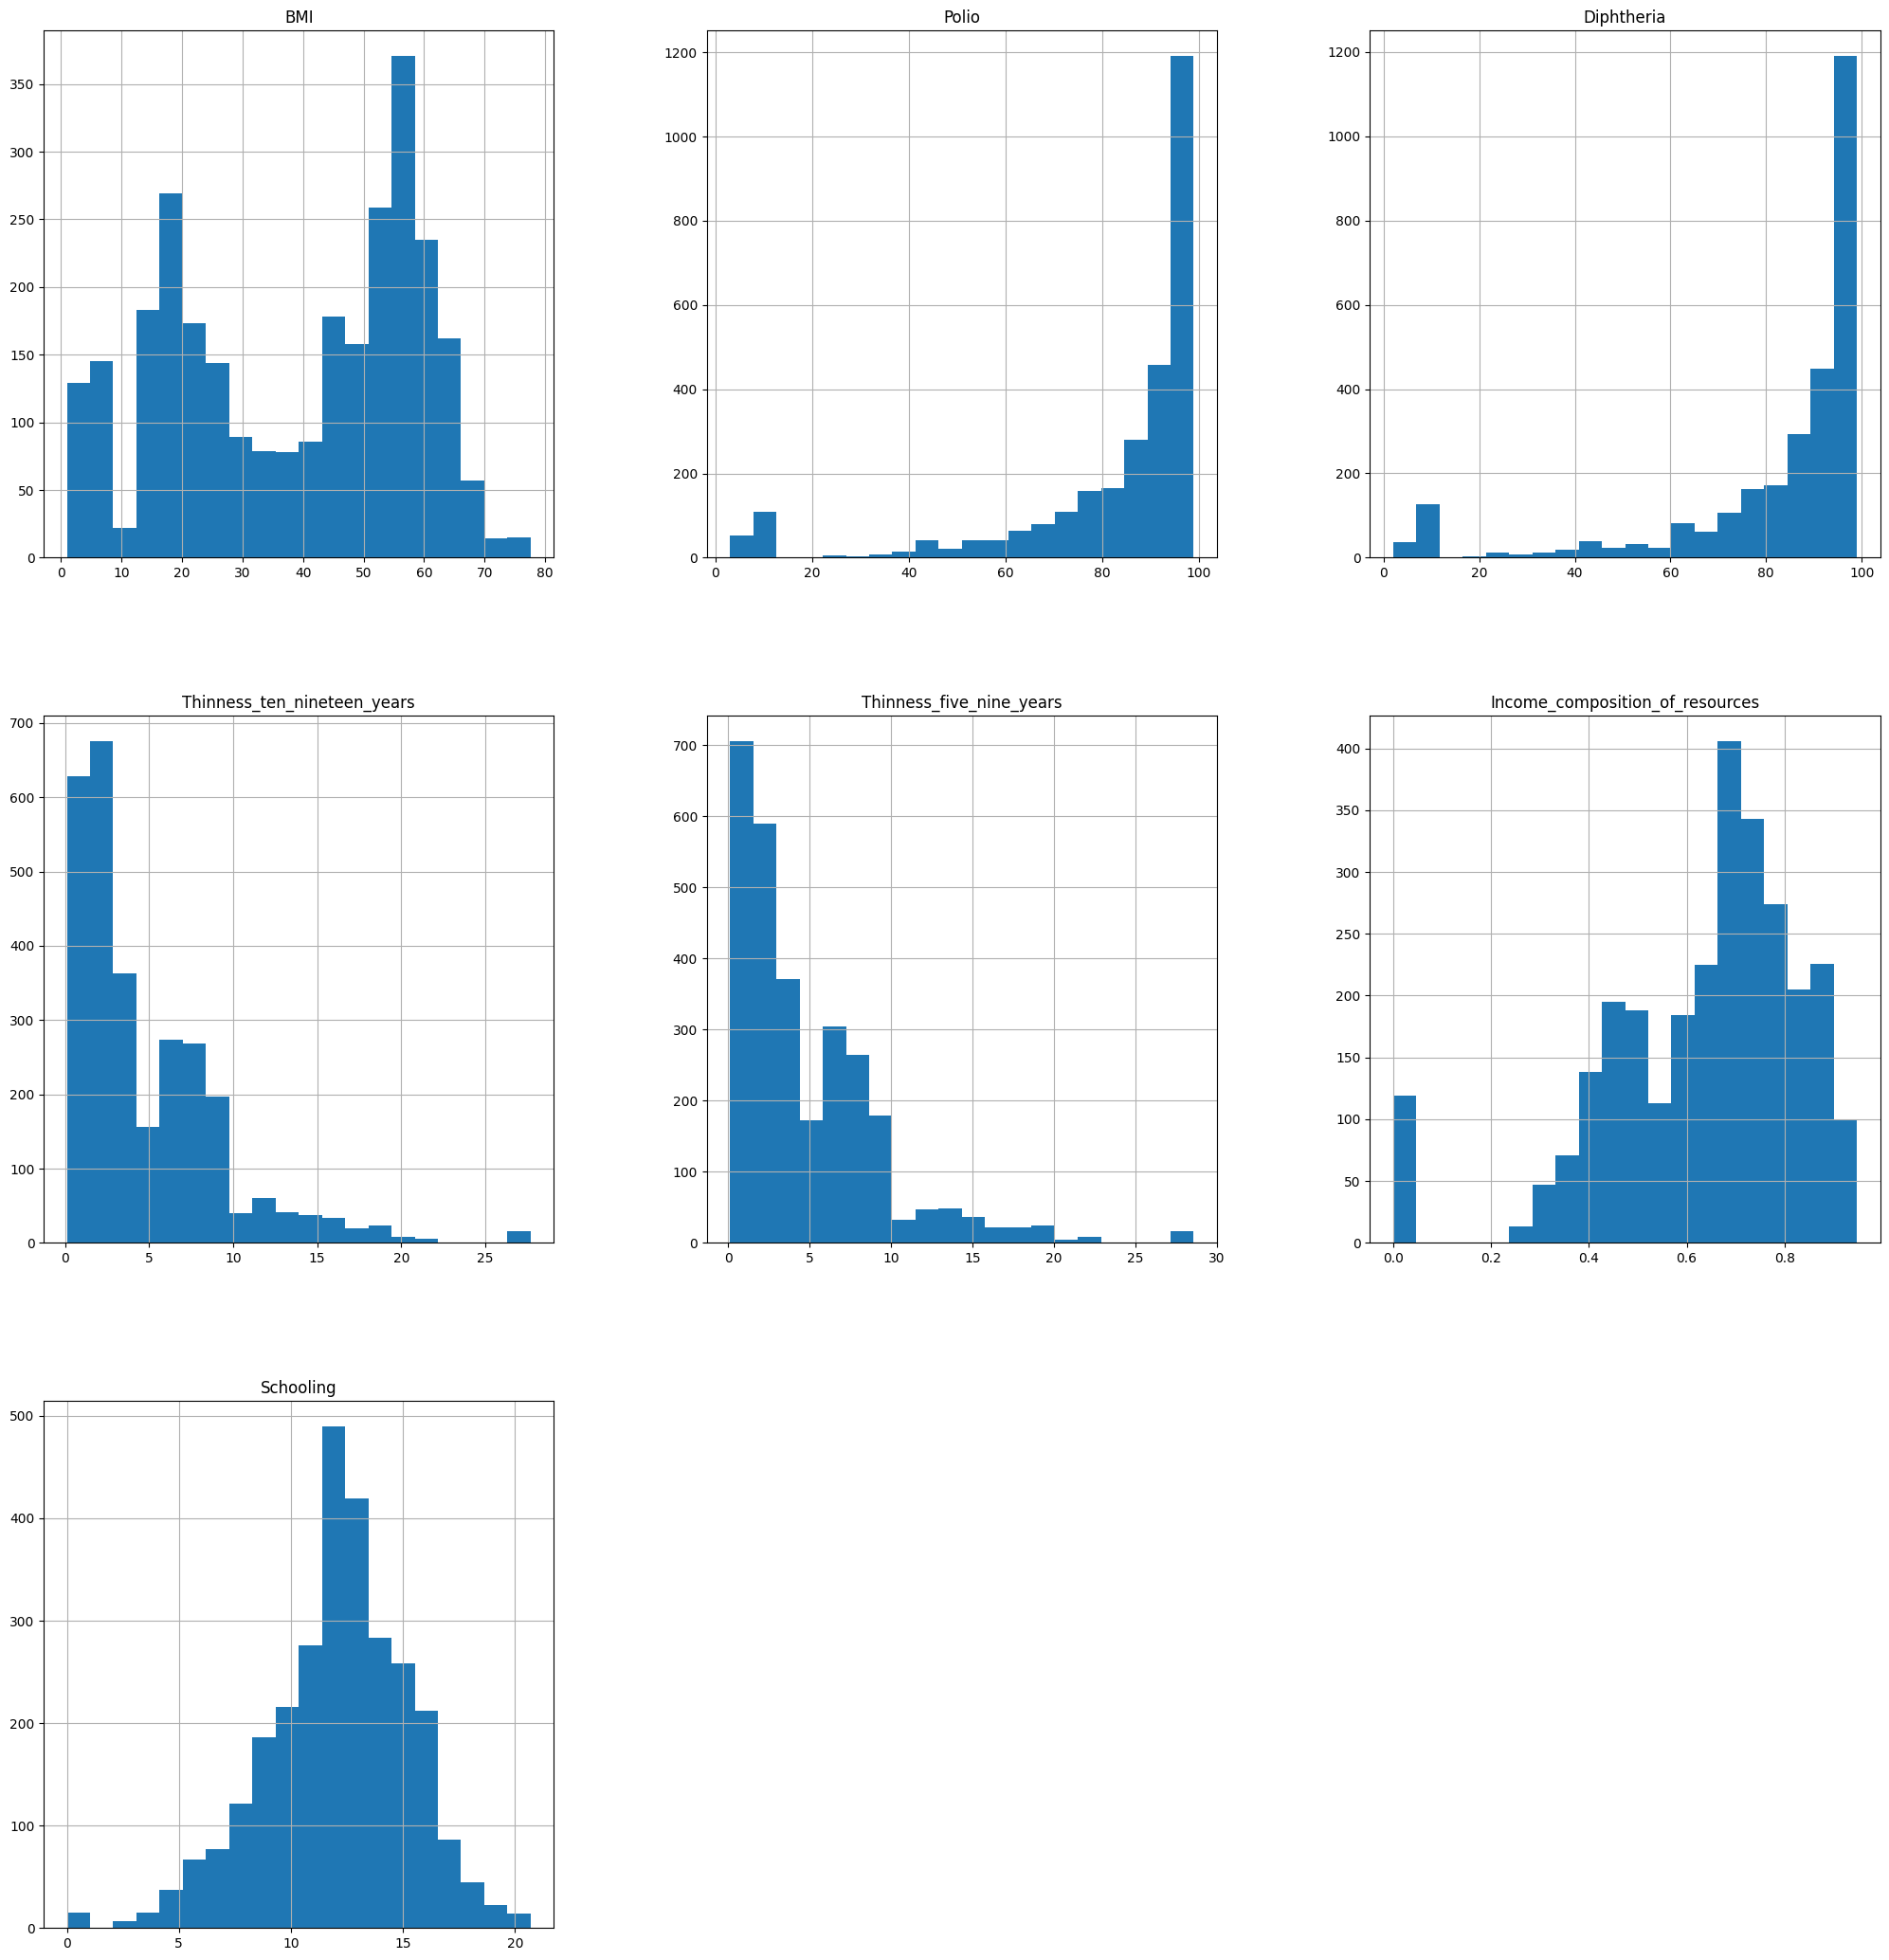

In [41]:
median_impute_column = {}
for column in median_impute_columns:
    median_impute_column[column] = ds_cleaned[column].median()
    ds_cleaned[column] = impute_na(ds_cleaned, column, median_impute_column[column])
    
ds_cleaned[median_impute_columns].hist(bins=20, figsize=(25,26))
plt.show()

In [42]:
r = 0
missing = list()
for x in ds_cleaned.columns:
    if ds_cleaned[x].isnull().sum() != 0:
        print(x, ds_cleaned[x].isnull().sum(), "\t\t\t\t\t",round((ds_cleaned[x].isnull().sum()*100)/ds_cleaned.shape[0],2),"%")
        missing.append(x)
        r+=1

print("\nCount columns: ", r)


Count columns:  0


### Now I'll see if there are any outliers in my data

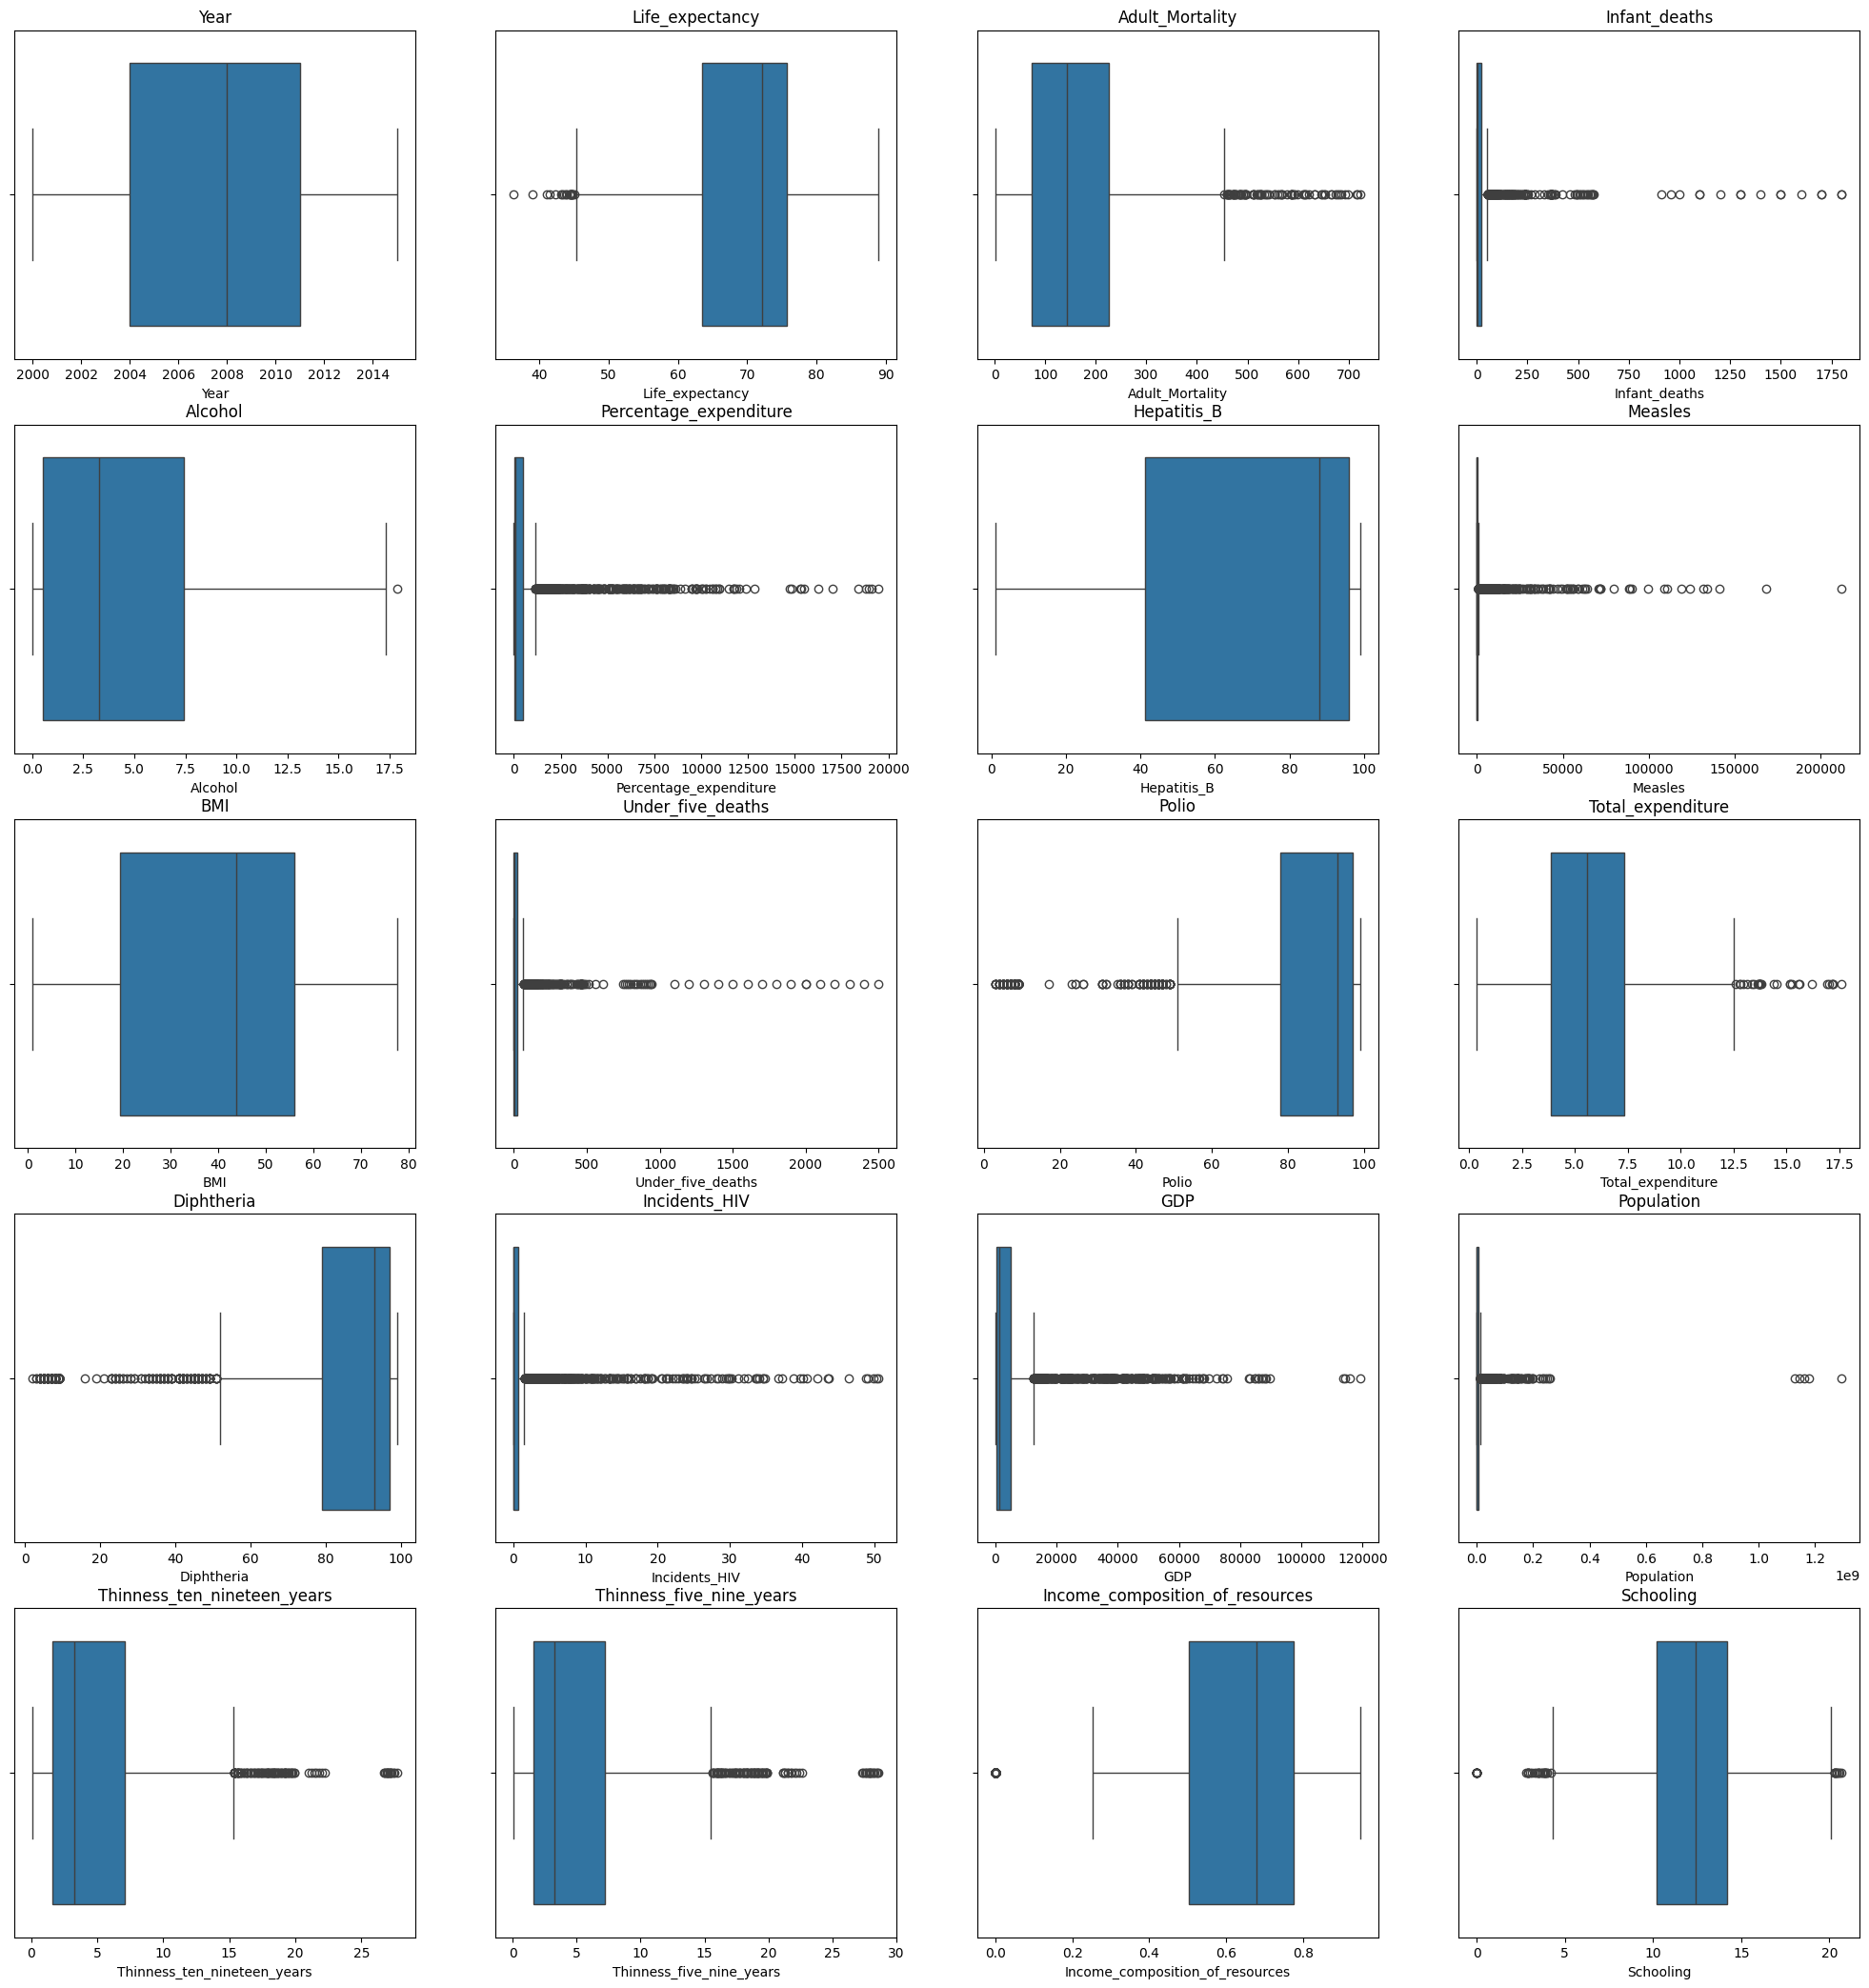

In [43]:
num_cols = ds_cleaned.select_dtypes(include=np.number).columns

fig , ax = plt.subplots(5,4,figsize=(25,26))
for i in range(len(num_cols[1:])):
    row = i // 4
    col = i % 4

    sns.boxplot(x=ds_cleaned[num_cols[i+1]],ax= ax[row,col])
    ax[row,col].set_title(num_cols[i+1])

plt.show()

There we can see, that the Year, Alcohol, MBI and Hepatit_B columns do not need to work with outliers, so for other columns I use the IQR method for otliers.

In [44]:
def find_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [45]:
ds_cleaned.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Status', 'Life_expectancy',
       'Adult_Mortality', 'Infant_deaths', 'Alcohol', 'Percentage_expenditure',
       'Hepatitis_B', 'Measles', 'BMI', 'Under_five_deaths', 'Polio',
       'Total_expenditure', 'Diphtheria', 'Incidents_HIV', 'GDP', 'Population',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [ ]:
outliers_left_columns = ['Life_expectancy','Polio','Diphtheria','Income_composition_of_resources', 'Schooling']

outliers_right_columns = [ 'Adult_Mortality', 'Infant_deaths', 'Alcohol','Percentage_expenditure', 'Measles', 'Under_five_deaths','Total_expenditure','Incidents_HIV', 'GDP', 'Population', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years','Schooling']


In [47]:
for column in outliers_left_columns:
    upper_boundary, lower_boundary = find_skewed_boundaries(ds_cleaned, column, 2)
    median_value = ds_cleaned[column].median()
    ds_cleaned.loc[ds_cleaned[column] < lower_boundary, column] = median_value

for column in outliers_right_columns:
    upper_boundary, lower_boundary = find_skewed_boundaries(ds_cleaned, column, 2)
    median_value = ds_cleaned[column].median()
    ds_cleaned.loc[ds_cleaned[column] > upper_boundary, column] = median_value


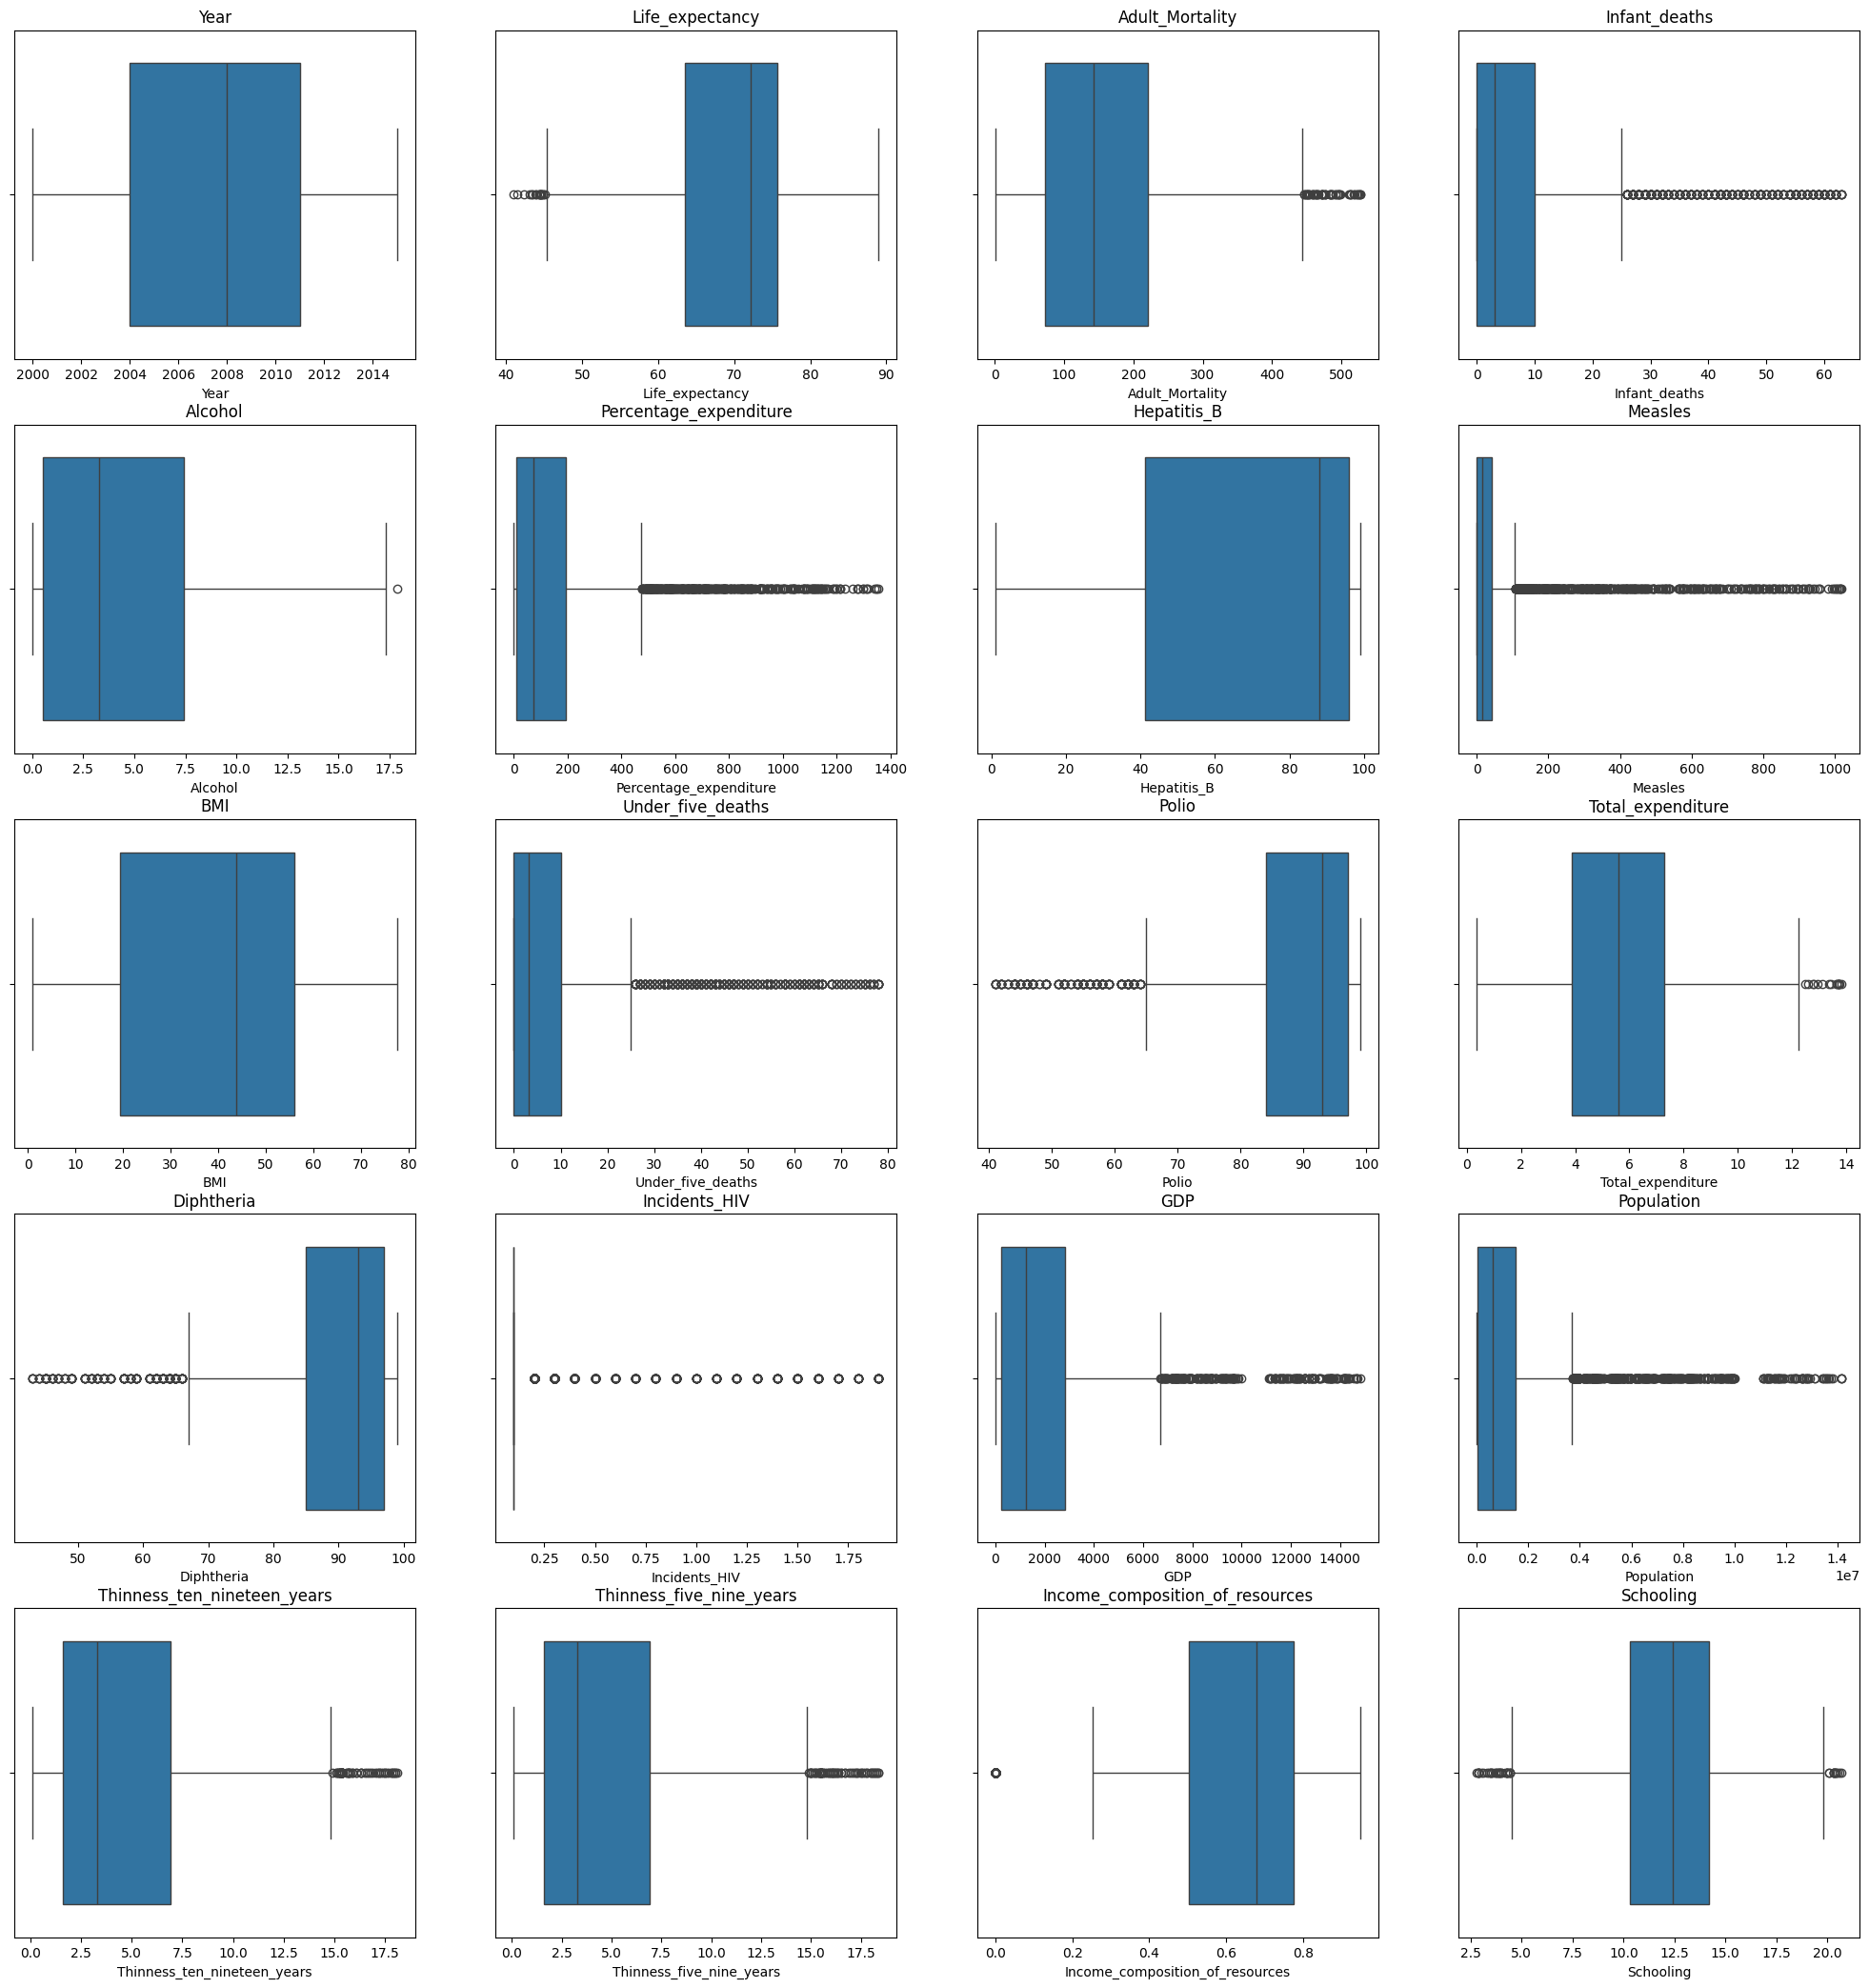

In [48]:
fig , ax = plt.subplots(5,4,figsize=(25,26))
for i in range(len(num_cols[1:])):
    row = i // 4
    col = i % 4

    sns.boxplot(x=ds_cleaned[num_cols[i+1]],ax= ax[row,col])
    ax[row,col].set_title(num_cols[i+1])

plt.show()

In [49]:
ds.shape, ds_cleaned.shape

((2938, 23), (2846, 23))

### Now I will do some manipulations with the categorical columns and then do the encoding

#### Since I have a large number of countries and it will be difficult to apply any conversion methods that will not negatively affect the model, I will convert all countries to the categories 

In [50]:
country_to_region = {
    'Cabo Verde': 'Africa', 'Saint Lucia': 'North America', 'Tunisia': 'Africa', 'Brunei Darussalam': 'Asia',
    'Equatorial Guinea': 'Africa', 'Papua New Guinea': 'Oceania', 'Ecuador': 'South America', 'Mongolia': 'Asia',
    'Poland': 'Europe', 'Oman': 'Asia', 'Senegal': 'Africa', 'Kuwait': 'Asia', 'Sierra Leone': 'Africa',
    'Saudi Arabia': 'Asia', 'India': 'Asia', 'Chad': 'Africa', 'Guinea-Bissau': 'Africa', 'Mauritius': 'Africa',
    'Ghana': 'Africa', 'Solomon Islands': 'Oceania', 'Ireland': 'Europe', 'Israel': 'Asia', 'Fiji': 'Oceania',
    'Uzbekistan': 'Asia', 'France': 'Europe', 'Malaysia': 'Asia', 'Singapore': 'Asia', "Côte d'Ivoire": 'Africa',
    'El Salvador': 'North America', 'Belarus': 'Europe', 'Luxembourg': 'Europe', 'Armenia': 'Asia', 'Turkmenistan': 'Asia',
    'Bahamas': 'North America', 'Belgium': 'Europe', 'Nicaragua': 'North America', 'Lesotho': 'Africa',
    'Iran (Islamic Republic of)': 'Asia', 'Dominican Republic': 'North America', 'Liberia': 'Africa',
    'Serbia': 'Europe', 'Denmark': 'Europe', 'Netherlands': 'Europe', 'Kyrgyzstan': 'Asia', 'Slovenia': 'Europe',
    'Kazakhstan': 'Asia', 'Azerbaijan': 'Asia', 'Nepal': 'Asia', 'Montenegro': 'Europe',
    'Democratic Republic of the Congo': 'Africa', 'Mali': 'Africa',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Bolivia (Plurinational State of)': 'South America', 
    'South Sudan': 'Africa', 'Finland': 'Europe', 'Cyprus': 'Europe', 'Uruguay': 'South America', 'Belize': 'North America',
    'United Republic of Tanzania': 'Africa', 'Madagascar': 'Africa', "Lao People's Democratic Republic": 'Asia',
    'Bahrain': 'Asia', 'Ukraine': 'Europe', 'Sweden': 'Europe', 'Kenya': 'Africa', 'Micronesia (Federated States of)': 'Oceania',
    'Cuba': 'North America', 'Cameroon': 'Africa', 'Gambia': 'Africa', 'Somalia': 'Africa', 'Pakistan': 'Asia', 'Malawi': 'Africa',
    'Yemen': 'Asia', 'Tajikistan': 'Asia', 'Mozambique': 'Africa', 'Jamaica': 'North America', 'Namibia': 'Africa', 'Spain': 'Europe',
    'Tonga': 'Oceania', 'Peru': 'South America', 'Botswana': 'Africa', 'Mexico': 'North America', 'Sao Tome and Principe': 'Africa',
    'Croatia': 'Europe', 'Malta': 'Europe', 'Switzerland': 'Europe', 'Honduras': 'North America',
    'Venezuela (Bolivarian Republic of)': 'South America', 'Uganda': 'Africa', 'Congo': 'Africa', 'Germany': 'Europe',
    'Georgia': 'Asia', 'Norway': 'Europe', 'Swaziland': 'Africa', 'Chile': 'South America', 'Slovakia': 'Europe', 'Iceland': 'Europe',
    'Brazil': 'South America', 'Barbados': 'North America', 'Myanmar': 'Asia', 'Guatemala': 'North America', 'Marshall Islands': 'Oceania',
    'Angola': 'Africa', 'Mauritania': 'Africa', 'China': 'Asia', 'Seychelles': 'Africa', 'Eritrea': 'Africa',
    'Morocco': 'Africa', "Democratic People's Republic of Korea": 'Asia', 'Burundi': 'Africa',
    'Antigua and Barbuda': 'North America', 'Timor-Leste': 'Asia', 'Djibouti': 'Africa', 'Romania': 'Europe',
    'Nigeria': 'Africa', 'Benin': 'Africa', 'The former Yugoslav republic of Macedonia': 'Europe',
    'Egypt': 'Africa', 'Comoros': 'Africa', 'Zimbabwe': 'Africa', 'Trinidad and Tobago': 'North America', 'Canada': 'North America',
    'Central African Republic': 'Africa', 'Lithuania': 'Europe', 'Sudan': 'Africa', 'Costa Rica': 'North America',
    'Republic of Moldova': 'Europe', 'Lebanon': 'Asia', 'Qatar': 'Asia', 'Sri Lanka': 'Asia',
    'United Arab Emirates': 'Asia', 'Indonesia': 'Asia', 'Saint Vincent and the Grenadines': 'North America', 'Panama': 'North America',
    'Albania': 'Europe', 'Paraguay': 'South America', 'Rwanda': 'Africa', 'Republic of Korea': 'Asia', 'Haiti': 'North America', 'Iraq': 'Asia',
    'Bhutan': 'Asia', 'Colombia': 'South America', 'Turkey': 'Asia', 'Philippines': 'Asia', 'Guinea': 'Africa', 'Grenada': 'North America',
    'Maldives': 'Asia', 'Gabon': 'Africa', 'New Zealand': 'Oceania', 'Samoa': 'Oceania', 'South Africa': 'Africa',
    'Niue': 'Oceania', 'Latvia': 'Europe', 'Australia': 'Oceania', 'Burkina Faso': 'Africa', 'Libya': 'Africa',
    'Bosnia and Herzegovina': 'Europe', 'Kiribati': 'Oceania', 'Argentina': 'South America', 'Cambodia': 'Asia',
    'Vanuatu': 'Oceania', 'Zambia': 'Africa', 'Japan': 'Asia', 'Guyana': 'South America', 'Afghanistan': 'Asia', 'Suriname': 'South America',
    'Thailand': 'Asia', 'Bangladesh': 'Asia', 'Greece': 'Europe', 'Austria': 'Europe', 'Ethiopia': 'Africa', 'Togo': 'Africa',
    'Czechia': 'Europe', 'Niger': 'Africa', 'Italy': 'Europe', 'Hungary': 'Europe', 'Estonia': 'Europe', 'Viet Nam': 'Asia',
    'Jordan': 'Asia', 'Russian Federation': 'Europe', 'Syrian Arab Republic': 'Asia',
    'United States of America': 'North America', 'Portugal': 'Europe', 'Bulgaria': 'Europe',
    'Saint Kitts and Nevis': 'North America', 'Algeria': 'Africa', 'Nauru': 'Oceania', 'Cook Islands': 'Oceania',
    'Palau': 'Oceania', 'Monaco': 'Europe', 'Dominica': 'North America'
}

def creat_Region_col(df, mapping=country_to_region):
    df["Region"] =df['Country'].map(country_to_region) 

#Apllying on copy
creat_Region_col(ds_cleaned)

In [51]:
ds_cleaned.head()

,Unnamed: 0,Country,Year,Status,Life_expectancy,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,...,Total_expenditure,Diphtheria,Incidents_HIV,GDP,Population,Thinness_ten_nineteen_years,Thinness_five_nine_years,Income_composition_of_resources,Schooling,Region
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,8.16,65.0,0.1,584.259210,614292.0,17.2,17.3,0.479,10.1,Asia
1,1,Afghanistan,2014,Developing,59.9,271.0,3,0.01,73.523582,62.0,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,2,Afghanistan,2013,Developing,59.9,268.0,3,0.01,73.219243,64.0,...,8.13,64.0,0.1,631.744976,614292.0,17.7,17.7,0.470,9.9,Asia
3,3,Afghanistan,2012,Developing,59.5,272.0,3,0.01,78.184215,67.0,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,4,Afghanistan,2011,Developing,59.2,275.0,3,0.01,7.097109,68.0,...,7.87,68.0,0.1,63.537231,2978599.0,3.3,18.2,0.454,9.5,Asia


### I will remove some columns like Country and Infant_deaths and then do the encoding for the categorical columns

In [52]:
ds_cleaned = ds_cleaned.drop(['Country', 'Infant_deaths'], axis=1)

In [53]:
ds_cleaned['Region'].unique()


array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [54]:
ds_encoding = ds_cleaned.copy()

In [55]:
columns_encoding = ['Region', 'Status']
for column in columns_encoding:
    tmp = pd.get_dummies(ds_encoding[column], prefix=column)
    tmp = tmp.astype(int)
    ds_encoding = ds_encoding.drop(column, axis=1)
    ds_encoding = pd.concat([ds_encoding, tmp], axis=1)
    
ds_encoding = ds_encoding.drop('Status_Developing', axis=1)
ds_encoding.head(10)

,Unnamed: 0,Year,Life_expectancy,Adult_Mortality,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,...,Thinness_five_nine_years,Income_composition_of_resources,Schooling,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Status_Developed
0,0,2015,65.0,263.0,0.01,71.279624,65.0,16,19.1,3.5,...,17.3,0.479,10.1,0,1,0,0,0,0,0
1,1,2014,59.9,271.0,0.01,73.523582,62.0,492,18.6,3.5,...,17.5,0.476,10.0,0,1,0,0,0,0,0
2,2,2013,59.9,268.0,0.01,73.219243,64.0,430,18.1,3.5,...,17.7,0.470,9.9,0,1,0,0,0,0,0
3,3,2012,59.5,272.0,0.01,78.184215,67.0,16,17.6,3.5,...,18.0,0.463,9.8,0,1,0,0,0,0,0
4,4,2011,59.2,275.0,0.01,7.097109,68.0,16,17.2,3.5,...,18.2,0.454,9.5,0,1,0,0,0,0,0
5,5,2010,58.8,279.0,0.01,79.679367,66.0,16,16.7,3.5,...,18.4,0.448,9.2,0,1,0,0,0,0,0
6,6,2009,58.6,281.0,0.01,56.762217,63.0,16,16.2,3.5,...,3.3,0.434,8.9,0,1,0,0,0,0,0
7,7,2008,58.1,287.0,0.03,25.873925,64.0,16,15.7,3.5,...,3.3,0.433,8.7,0,1,0,0,0,0,0
8,8,2007,57.5,295.0,0.02,10.910156,63.0,16,15.2,3.5,...,3.3,0.415,8.4,0,1,0,0,0,0,0
9,9,2006,57.3,295.0,0.03,17.171518,64.0,16,14.7,3.5,...,3.3,0.405,8.1,0,1,0,0,0,0,0


In [56]:
ds_encoding.to_csv('D:/3Kurs/1Sem/SS/rgr/Data/Life_Expectancy_Data_fixed_cleaned.csv', index=False)

### Now i will do some columns minimization for some sensitive machine models

In [60]:
ds_scale = ds_encoding.copy()
colmns_to_scale = ['Population', 'GDP', 'Percentage_expenditure', 'Total_expenditure']

ds_scale[colmns_to_scale].describe()

,Population,GDP,Percentage_expenditure,Total_expenditure
count,2.846000e+03,2846.000000,2846.000000,2846.000000
mean,1.572294e+06,2137.603328,170.434810,5.590111
std,2.703609e+06,2944.724284,263.502769,2.549440
min,3.400000e+01,1.681350,0.000000,0.370000
25%,1.338200e+04,243.774444,7.367943,3.870000
50%,6.142765e+05,1245.225546,72.021728,5.580000
75%,1.492400e+06,2824.055908,194.376002,7.300000
max,1.416144e+07,14817.377780,1356.022164,13.830000


In [61]:
scaler = MinMaxScaler()
ds_scale[colmns_to_scale] = scaler.fit_transform(ds_scale[colmns_to_scale])
ds_scale[colmns_to_scale].describe()

,Population,GDP,Percentage_expenditure,Total_expenditure
count,2846.000000,2846.000000,2846.000000,2846.000000
mean,0.111024,0.144166,0.125687,0.387824
std,0.190914,0.198757,0.194320,0.189409
min,0.000000,0.000000,0.000000,0.000000
25%,0.000943,0.016340,0.005433,0.260030
50%,0.043374,0.083934,0.053113,0.387073
75%,0.105383,0.190499,0.143343,0.514859
max,1.000000,1.000000,1.000000,1.000000


In [62]:
ds_scale.to_csv('D:/3Kurs/1Sem/SS/rgr/Data/Life_Expectancy_Data_fixed_scaled.csv', index=False)